# Are Detector Effects Inducing Ambiguous $\omega\pi^0$ PWA Results?
The results of the [detector effects](../detector_effects/detector_effects.ipynb) input-output study showed no clear indication of where the bin-to-bin inconsistencies are occurring in $\omega\pi^0$ partial wave analysis. No single detector effect appeared to be responsible for the problem, but it was clear that when using the *ideal* or "thrown" Monte Carlo data, there were no issues (aside from the expected fluctuations in negative reflectivity $\varepsilon=-1$ waves). This suggests that the detector effects could be "muddying" the likelihood to such a degree that an unambiguous minimum is no longer obtainable. The best way to check for ambiguities is to project the partial wave results to **Moments**. 

In short, moments $H$ are the expansion coefficients of orthogonal basis functions 
$$
    I^\alpha(\Omega,\Omega_H) = 
        \sum_{J_v=0}^2
        \sum_{\Lambda=-2}^{2}
        \sum_{J=0}^{2*\text{max}(J_i)}
        \sum_{M=-2*\text{max}(m_i)}^{2*\text{max}(m_i)}
        \frac{2J+1}{4\pi} \frac{2J_v+1}{4\pi}
        H^\alpha(J_v,\Lambda,J,M) 
        D_{M,\Lambda}^{J\ast}(\Omega) D_{\Lambda,0}^{J_v\ast}(\Omega_H)
        \,,
$$
here the Wigner D-functions $D_{m,n}^i(\theta,\phi,0)$, that describe our intensity. Though they lack the physical interpretation that partial waves provide, they are unique by construction i.e. do not suffer from ambiguous solutions. Moments can be written in terms of spin density matrix elements $\rho_{i,j,m_i,m_j}$ as
\begin{align*}
H^\alpha(J_v,\Lambda,J,M) = 
        &\sum_{i=0}^{\text{max}(J\ell)_i}
        \sum_{j=0}^{\text{max}(J\ell)_j}
        \sum_{m_i=-J_i}^{J_i}
        \sum_{m_j=-J_j}^{J_j}
        \sum_{\lambda=-1}^1
        \sum_{\lambda'=-1}^1
        \frac{1}{2J_j+1} \frac{1}{3}
        \\
        &\times
        \braket{\ell_i,0;1,\lambda|J_i,\lambda}
        \braket{\ell_j,0;1,\lambda'|J_j,\lambda'}
        \\
        &\times
        \braket{1,\lambda;J_v,\Lambda|1,\lambda'}
        \braket{1,0;J_v,0|1,0}        
        \\
        &\times 
        \braket{J_i,m_i;J,M|J_j,m_j}
        \braket{J_i,\lambda;J,\Lambda|J_j,\lambda'}
        \rho_{i,j,m_i,m_j}^\alpha
        \Psi^i(w)\Psi^{j\ast}(w)
    \,,
\end{align*}
which are composed of the PWA complex production coefficients $[c]$ in the reflectivity basis
\begin{align}    
    \rho^0_{i,j,m_i,m_j} &=
    \sum_\varepsilon
        [c^i]_{m_i}^{\varepsilon} [c^j]_{m_j}^{\varepsilon\ast} +
        (-1)^{m_i+m_j+\ell_i+\ell_j+J_i+J_j}
        [c^i]_{-m_i}^{\varepsilon} [c^j]_{-m_j}^{\varepsilon\ast}
    \,,
    \\          
    \rho^1_{i,j,m_i,m_j} &=
    \sum_\varepsilon
        \varepsilon \left(
            (-1)^{1+m_i+\ell_i+J_i}
            [c^i]_{-m_i}^{\varepsilon} [c^j]_{m_j}^{\varepsilon\ast} +
            (-1)^{1+m_j+\ell_j+J_j}
            [c^i]_{m_i}^{\varepsilon} [c^j]_{-m_j}^{\varepsilon\ast}
        \right)
    \,,    
    \\  
    \rho^2_{i,j,m_i,m_j} &= i
    \sum_\varepsilon
        \varepsilon \left(
            (-1)^{m_i+\ell_i+J_i}
            [c^i]_{-m_i}^{\varepsilon} [c^j]_{m_j}^{\varepsilon\ast} -
            (-1)^{m_j+\ell_j+J_j}
            [c^i]_{m_i}^{\varepsilon} [c^j]_{-m_j}^{\varepsilon\ast}
        \right)  
    \,.    
\end{align}
For a more detailed explanation of these moments and how they can be obtained from the original partial wave description of the intensity, see [the linked note](). When ambiguities are present this effectively means different combinations of partial wave values can reproduce the same intensity value, and thus the same moments. The core problem is one of an underdetermined system of equations, in which there are simply more free parameters (partial waves) than equations to constrain them. By projecting out the moments for two partial wave fit results, we can determine whether or not they are part of the same unique solution, and thus ambiguous.

This study will have a very similar structure to the detector effects study, where a "truth" file for each detector effect that contains the true generated values is used as a comparison point for "truth-initialized" fits, or a fit whose parameters are initialized to the generated values. This study will project out the moment values from the truth and truth-initialized results in each detector effect situation. If the fit result agrees with the truth values, such as in the *ideal* case, then there is no concern, as its clear the fit is able to arrive at the true solution. If the partial wave fits do not agree, then we can expect the following two outcomes:

1. **The projected moment values agree** and thus our fit is 1 of potentially many ambiguous solutions. As stated before, differing partial wave results with identical moments means that we have found a case in which the same intensity value can be described by different sets of partial wave values.
2. **The projected moment values disagree** and so we can conclude that our fit is diverging towards a uniquely different solution from the true one. 

Both situations are troubling. The only way to solve the ambiguities of case 1 would be to add constraints e.g. mass-dependent functions and/or removing waves. Case 2 does not rule out whether the true minima has ambiguities, and tells us that for some odd reason the fit diverges to a wrong result, despite being initialized right at the true set of parameters.

## Study Details
At its core, this is an input-output study. The input is [GlueX $\omega\pi^0$ Monte Carlo](https://halldweb.jlab.org/wiki-private/index.php/Omega_Pi_Simulation_Samples_Version_3#Neutral_signal_versionsver3.1) signal (`ver3.1`) and phasespace (`ver03`) files, that are passed through a DSelector which turns on/off several detector effects. The output is the partial wave fits, whose values are initialized to the "true" values that generated the input, and the corresponding moments projected from those fits.

### Input
We have the following effects available to study:
1. No effects (referred to as *thrown* or *ideal*): This is the "perfect detector" scenario where all tracks are detected, reconstructed, and identified exactly
2. Acceptance Effects: In this case the detector acceptance is applied, and so we only use tracks that are detected in the simulation. Note that the 4-momenta still match their generated values
3. Reconstruction (or *matched*): Now we apply the reconstruction algorithm, and so our 4 momenta now have some resolution effects applied to them. This is called the *matched* case because we are still using perfect identification of the particles i.e. we know precisely which two photons were produced from the $\pi^0$ in the $\omega\rightarrow \pi^+\pi^-\pi^0$ decay, which otherwise could have been confused with the $\pi^0$ in the $X\rightarrow \omega\pi^0$ decay. We do this by "matching" the generated to the reconstructed tracks for the photons. In this way we use the reconstructed values but have no mis-identification possibilities
   1. Note that we are only matching the $\pi^0$'s, but in theory the $\pi^+$ from the $\omega$ could be confused with the recoil proton. This is highly unlikely to occur though, and so is of no concern.
4. All Effects: This final step applies the detector effects, reconstruction algorithm, and allows for $\pi^0$ combinatorics to occur, thus providing the closest approximation of real data as possible.

In addition to the above, every one of these steps has an additional effect we can tack on: the out-of-time beam photons. When we use any "no-accidental" data, it means that our beam photon 4-momenta comes from the exact photon that generated the event. This is an idealized case, and we can instead simulate real data by having a set of out-of-time photons lie under the prompt in-time peak. To best determine what photon generated the event, we will then have to use the RF sideband subtraction method to remove these out-of-time photons, which is of course not perfect and can cause us to use the wrong photon. In short, any dataset labelled "noaccidental" uses the precise beam photon that generated the event, and datasets without this flag use RF sideband subtraction.

All together we have 8 datasets: 4 simulated effects + with/without RF sideband subtraction for each.


For any of these detector scenarios, the data is separated into bins of $\omega\pi^0$ mass 20 MeV wide, from 1.0 - 2.0 GeV. It uses the coherent peak energy range (8.2 - 8.8 GeV) and selects events within the the four moment transfer window $0.3 < -t < 0.5~GeV^2$. There is nothing particularly special about this window, but was simply chosen to limit the dataset file sizes. 


### Output
explain some of the details of modifying prod coeffs by BWs like I did before

## Loading Data and Pre-Processing

### Packages
Lets start by loading in some packages and paths

In [1]:
# load some typical libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from typing import Dict, List

# load in default matplotlib style
plt.style.use("/w/halld-scshelf2101/kscheuer/neutralb1/analysis/scripts/pwa_plotter.mplstyle")

# load useful paths and functions
from pathlib import Path
import os, sys
parent_dir = str(Path().resolve().parents[2])
working_dir = f"{parent_dir}/analysis/input-output-tests/moment-projection/"
sys.path.insert(0, parent_dir)
import analysis.scripts.pwa_tools as pwa_tools

# Load the environment variables. This contains needed setup_gluex.sh variables e.g. $ROOTSYS, $HALLD_HOME
import subprocess
command = f"bash -l -c 'source {parent_dir}/setup_gluex.sh && env'"
proc = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True, executable='/bin/bash')
output, _ = proc.communicate()
# Parse the environment variables
env_vars = {}
for line in output.decode().splitlines():       
    # the output contains a bunch of BASH_FUNCS that will ruin the environment variables. this avoids those issues
    if len(line.split('=', 1)) != 2 or line.startswith("BASH_FUNC") or line.startswith(" ") or line.startswith("\t"):
        continue    
    key, value = line.split('=', 1)
    env_vars[key] = value
os.environ.update(env_vars)

### Loading fit results
The following cell is in raw mode to avoid unnecessary execution, and is kept here as a reminder of what flags were used to submit the fits

Lets now store all of the fit results as a csv, along with their moments in a separate csv file

In [2]:
# Thrown files
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcthrown/ver03/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_1.*/truth/best_truth.fit -o $working_dir/thrown/thrown/truth.csv
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcthrown/ver03/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_1.*/truth/init/best_truth.fit -o $working_dir/thrown/thrown/fit.csv
# # %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcthrown/ver03/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_1.*/truth/anglesOmegaPiAmplitude_0.root -o $working_dir/thrown/data.csv --sort-index -2
# %run -i $parent_dir/analysis/scripts/project_moments.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcthrown/ver03/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/best_truth.fit -o $working_dir/thrown/truth_moments.csv -b
# %run -i $parent_dir/analysis/scripts/project_moments.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcthrown/ver03/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/init/best_truth.fit -o $working_dir/thrown/fit_moments.csv -b

# Accept noaccidental
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcaccept_noaccidental/ver03_accept/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/best_truth.fit -o $working_dir/accept_noaccidental/truth.csv
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcaccept_noaccidental/ver03_accept/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/init/best_truth.fit -o $working_dir/accept_noaccidental/fit.csv
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcaccept_noaccidental/ver03_accept/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/anglesOmegaPiAmplitude_0.root -o $working_dir/accept_noaccidental/data.csv --sort-index -2
# %run -i $parent_dir/analysis/scripts/project_moments.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcaccept_noaccidental/ver03_accept/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/best_truth.fit -o $working_dir/accept_noaccidental/truth_moments.csv -b
# %run -i $parent_dir/analysis/scripts/project_moments.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcaccept_noaccidental/ver03_accept/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/init/best_truth.fit -o $working_dir/accept_noaccidental/fit_moments.csv -b

# Accept
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcaccept/ver03_accept/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/best_truth.fit -o $working_dir/accept/truth.csv
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcaccept/ver03_accept/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/init/best_truth.fit -o $working_dir/accept/fit.csv
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcaccept/ver03_accept/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/anglesOmegaPiAmplitude_0.root -o $working_dir/accept/data.csv --sort-index -2
# %run -i $parent_dir/analysis/scripts/project_moments.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcaccept/ver03_accept/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/best_truth.fit -o $working_dir/accept/truth_moments.csv -b
# %run -i $parent_dir/analysis/scripts/project_moments.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcaccept/ver03_accept/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/init/best_truth.fit -o $working_dir/accept/fit_moments.csv -b

# Matched noaccidental
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcmatched_noaccidental/ver03_matched/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/best_truth.fit -o $working_dir/matched_noaccidental/truth.csv
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcmatched_noaccidental/ver03_matched/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/init/best_truth.fit -o $working_dir/matched_noaccidental/fit.csv
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcmatched_noaccidental/ver03_matched/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/anglesOmegaPiAmplitude_0.root -o $working_dir/matched_noaccidental/data.csv --sort-index -2
# %run -i $parent_dir/analysis/scripts/project_moments.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcmatched_noaccidental/ver03_matched/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/best_truth.fit -o $working_dir/matched_noaccidental/truth_moments.csv -b
# %run -i $parent_dir/analysis/scripts/project_moments.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcmatched_noaccidental/ver03_matched/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/init/best_truth.fit -o $working_dir/matched_noaccidental/fit_moments.csv -b

# Matched
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcmatched/ver03_matched/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/best_truth.fit -o $working_dir/matched/truth.csv
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcmatched/ver03_matched/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/init/best_truth.fit -o $working_dir/matched/fit.csv
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcmatched/ver03_matched/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/anglesOmegaPiAmplitude_0.root -o $working_dir/matched/data.csv --sort-index -2
# %run -i $parent_dir/analysis/scripts/project_moments.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcmatched/ver03_matched/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/best_truth.fit -o $working_dir/matched/truth_moments.csv -b
# %run -i $parent_dir/analysis/scripts/project_moments.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcmatched/ver03_matched/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/init/best_truth.fit -o $working_dir/matched/fit_moments.csv -b

# All Effects noaccidental TODO: th 1.96-1.98 bin keeps failing, replace it with .fit of 0's
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcnoaccidental/ver03/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/best_truth.fit -o $working_dir/all_noaccidental/truth.csv
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcnoaccidental/ver03/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/init/best_truth.fit -o $working_dir/all_noaccidental/fit.csv
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcnoaccidental/ver03/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/anglesOmegaPiAmplitude_0.root -o $working_dir/all_noaccidental/data.csv --sort-index -2
# %run -i $parent_dir/analysis/scripts/project_moments.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcnoaccidental/ver03/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/best_truth.fit -o $working_dir/all_noaccidental/truth_moments.csv -b
# %run -i $parent_dir/analysis/scripts/project_moments.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mcnoaccidental/ver03/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/init/best_truth.fit -o $working_dir/all_noaccidental/fit_moments.csv -b

# # All Effects
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mc/ver03/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/best_truth.fit -o $working_dir/all_effects/truth.csv
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mc/ver03/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/init/best_truth.fit -o $working_dir/all_effects/fit.csv
# %run -i $parent_dir/analysis/scripts/convert_to_csv.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mc/ver03/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/anglesOmegaPiAmplitude_0.root -o $working_dir/all_effects/data.csv --sort-index -2
# %run -i $parent_dir/analysis/scripts/project_moments.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mc/ver03/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/best_truth.fit -o $working_dir/all_effects/truth_moments.csv -b
# %run -i $parent_dir/analysis/scripts/project_moments.py -i ~/volatile/ampToolsFits/omegapi/allPeriods/PARA_0/ver03.1_mc/ver03/1m_1p_iso/recoil-pi-mass_0.0/t_0.30-0.50/mass_*/truth/init/best_truth.fit -o $working_dir/all_effects/fit_moments.csv -b


and then load all of these into pandas dataframes. Pandas will interpret the moment csv's to be strings, so we need to ensure they're interpreted as complex values

In [3]:
def load_dataframes(subdir:str) -> Dict[str, pd.DataFrame]:
    if not subdir.endswith("/"):
        subdir += "/"

    # load dataframes. Assumes files all in same format for any subdir
    truth = pd.read_csv(f"{subdir}truth.csv")
    truth_moments = pd.read_csv(f"{subdir}truth_moments.csv")
    fit = pd.read_csv(f"{subdir}fit.csv")
    fit_moments = pd.read_csv(f"{subdir}fit_moments.csv")
    data = pd.read_csv(f"{subdir}data.csv")

    # make sure moment dataframes register as complex values (except for the file column)
    truth_moments.loc[:, truth_moments.columns != "file"] = truth_moments.loc[:, truth_moments.columns != "file"].astype(complex)
    fit_moments.loc[:, fit_moments.columns != "file"] = fit_moments.loc[:, fit_moments.columns != "file"].astype(complex)

    df_dict = {
        "truth" : truth,
        "truth_moments" : truth_moments,
        "fit" : fit,
        "fit_moments" : fit_moments,
        "data" : data
    }

    return df_dict

# Load all the dataframes
thrown_dfs = load_dataframes(f"{working_dir}thrown/")
accept_noacc_dfs = load_dataframes(f"{working_dir}accept_noaccidental/")
accept_dfs = load_dataframes(f"{working_dir}accept/")
matched_noacc_dfs = load_dataframes(f"{working_dir}matched_noaccidental/")
matched_dfs = load_dataframes(f"{working_dir}matched/")
# all_effects_noacc_dfs = load_dataframes(f"{working_dir}all_noaccidental/")
all_effect_dfs = load_dataframes(f"{working_dir}all_effects/")

df_array = {
    "thrown": thrown_dfs,
    "accept_noacc": accept_noacc_dfs,
    "accept": accept_dfs,
    "matched_noacc": matched_noacc_dfs,
    "matched": matched_dfs,
#     "all_noacc": all_effects_noacc_dfs, #TODO: once fit fixed, we can load these
    "all_effects": all_effect_dfs
}

# TODO: delete, its temporary just for running old scratch work
df_all_truth = all_effect_dfs["truth"]
df_all_truth_moments = all_effect_dfs["truth_moments"]
df_all_fit = all_effect_dfs["fit"]
df_all_fit_moments = all_effect_dfs["fit_moments"]
df_all_data = all_effect_dfs["data"]

### Pre-Processing
Before we get into any real analysis, we'll want to run some common checks on our moments to ensure that they're projection from amplitudes $\rightarrow$ moments ran as expected.

#### Real & Imaginary Parts
First let's check that the imaginary(real) parts of the $H^0,H^1$($H^2$) moments are zero as we expect. Lets plot these components as a function of mass for each file's truth and fit moments. We can also use this chance to check that our truth and fit results have the same moment set as well i.e. number of rows and columns in the csv's match

Plotting thrown


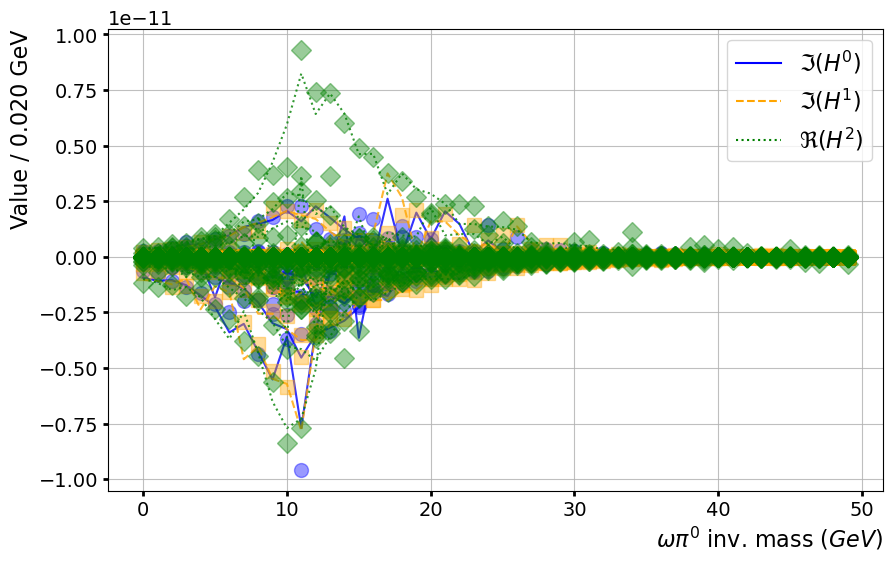

Plotting accept_noacc


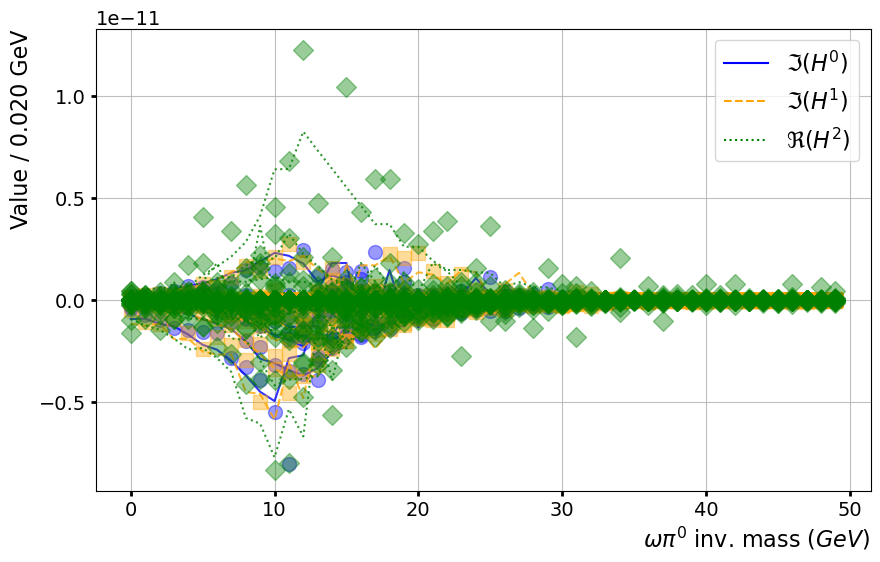

Plotting accept


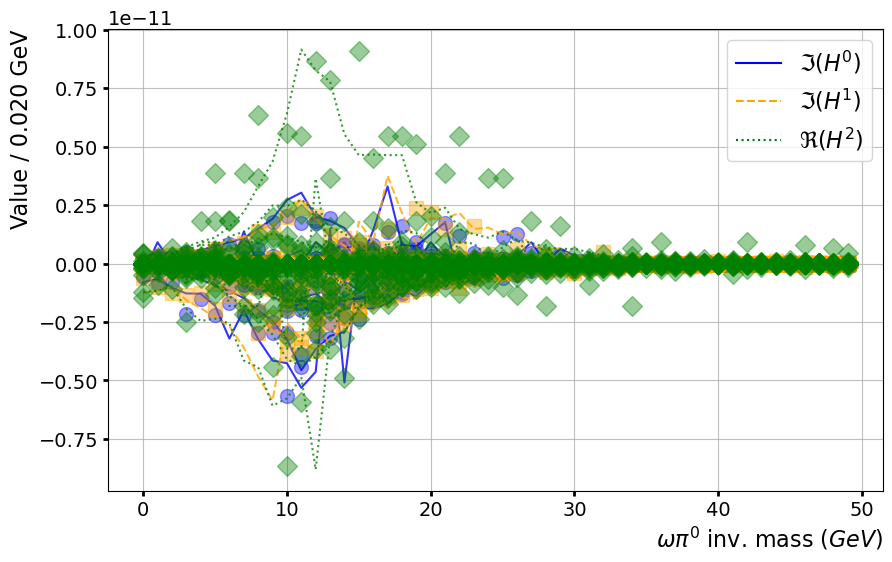

Plotting matched_noacc


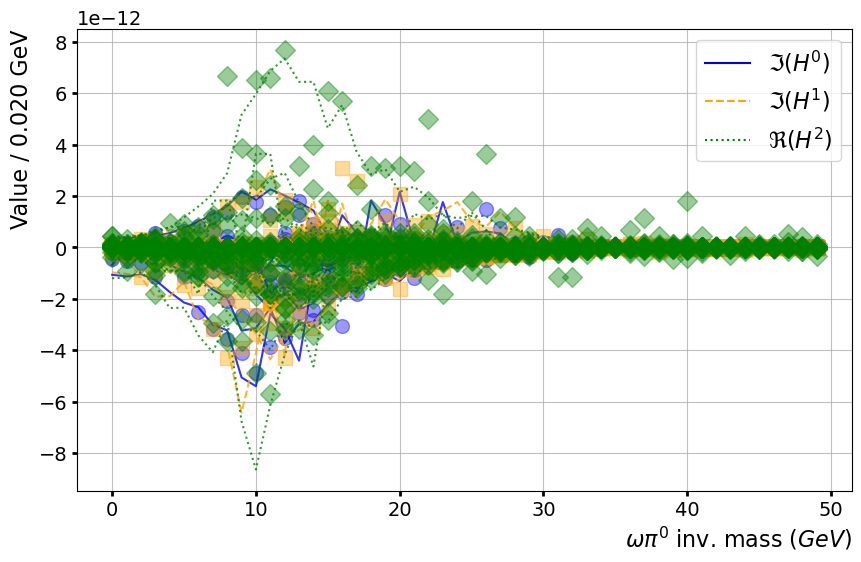

Plotting matched


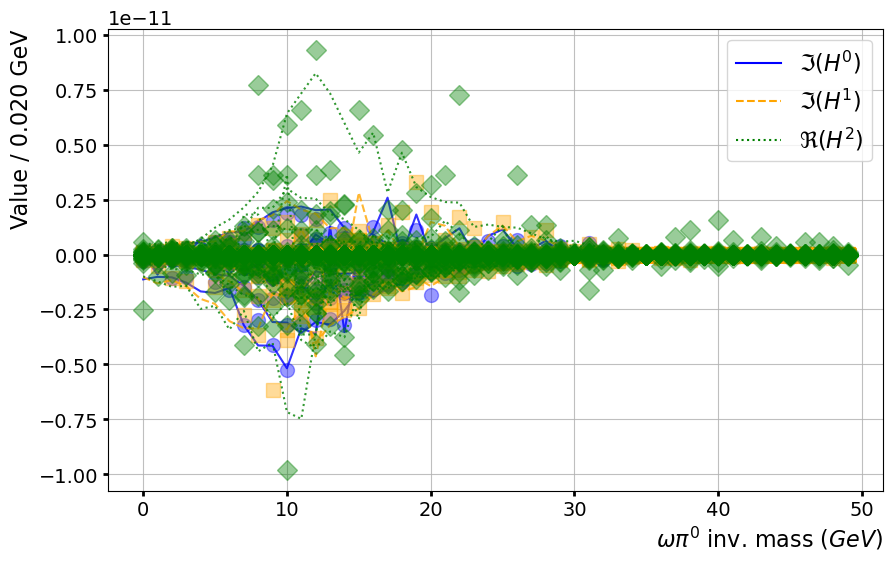

Plotting all_effects


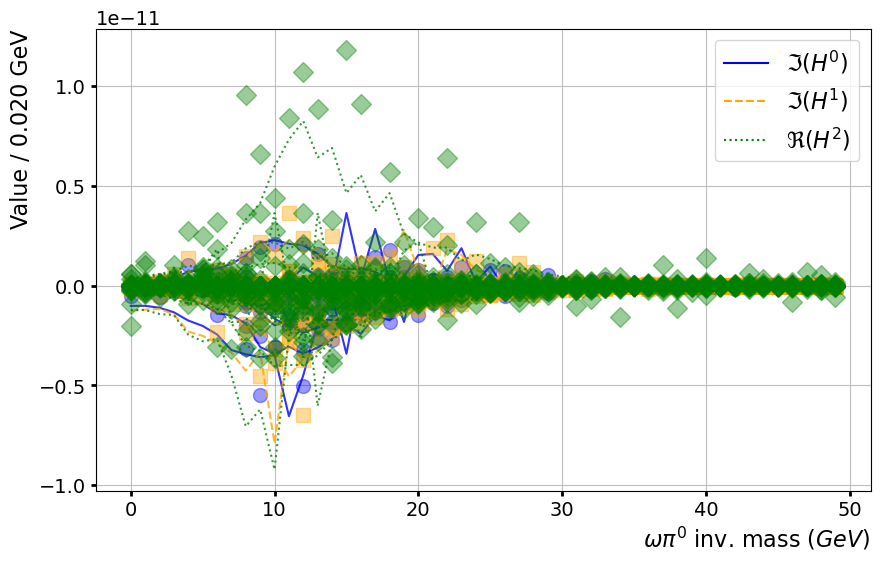

In [4]:
for key, val in df_array.items():
    if val["truth_moments"].shape[0] != val["fit_moments"].shape[0]:
        raise ValueError(f"{key} truth_moments and fit_moments have different number of rows")
    if val["truth_moments"].shape[1] != val["fit_moments"].shape[1]:
        raise ValueError(f"{key} truth_moments and fit_moments have different number of moments")
    
    h0_columns = [col for col in val["truth_moments"].columns if col.startswith("H0")]
    h1_columns = [col for col in val["truth_moments"].columns if col.startswith("H1")]
    h2_columns = [col for col in val["truth_moments"].columns if col.startswith("H2")]

    fig, ax = plt.subplots(figsize=(10, 6))
    
    mass_bins = val["data"]["m_center"]
    bin_width = (val["data"]["m_high"] - val["data"]["m_low"])[0]

    val["truth_moments"][h0_columns].map(lambda x: x.imag).plot(ax=ax, linestyle="-", color="blue", alpha=0.8, legend=False)
    val["fit_moments"][h0_columns].map(lambda x: x.imag).plot(ax=ax, linestyle="", marker="o", color="blue", alpha=0.4, legend=False)
    val["truth_moments"][h1_columns].map(lambda x: x.imag).plot(ax=ax, linestyle="--", alpha=0.8, color="orange", legend=False)
    val["fit_moments"][h1_columns].map(lambda x: x.imag).plot(ax=ax, linestyle="", marker="s", color="orange", alpha=0.4, legend=False)
    val["truth_moments"][h2_columns].map(lambda x: x.real).plot(ax=ax, linestyle=":", alpha=0.8, color="green", legend=False)
    val["fit_moments"][h2_columns].map(lambda x: x.real).plot(ax=ax, linestyle="", marker="D", color="green", alpha=0.4, legend=False)

    h0_dummy = mpl.lines.Line2D([0], [0], linestyle="-", color="blue", label=r"$\Im(H^0)$")
    h1_dummy = mpl.lines.Line2D([0], [0], linestyle="--", color="orange", label=r"$\Im(H^1)$")
    h2_dummy = mpl.lines.Line2D([0], [0], linestyle=":", color="green", label=r"$\Re(H^2)$")

    ax.legend(handles=[h0_dummy, h1_dummy, h2_dummy])

    print(f"Plotting {key}")
    ax.set_xlabel(r"$\omega\pi^0$ inv. mass $(GeV)$", loc="right")
    ax.set_ylabel(f"Value / {bin_width:.3f} GeV", loc="top")
    plt.show()
    
    

#### $H^0(0,0,0,0)$ =? Generated Events
The next sanity check we can perform is to see how close the $H^0(0,0,0,0)$ moment is to the number of generated events. If all factors are handled appropriately these two should match. Even if they don't, we will normalize them soon. Below we'll plot the truth and fit $H^0(0,0,0,0)$ moments with the \# of generated events, and what scale factor these are off by (averaged over the mass bins).


Plotting thrown


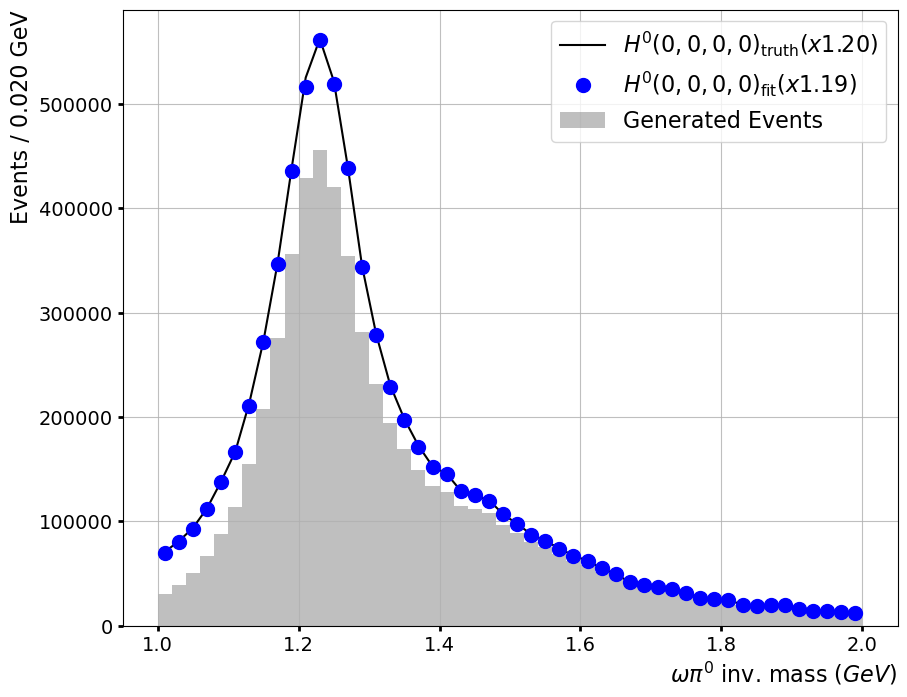

Plotting accept_noacc


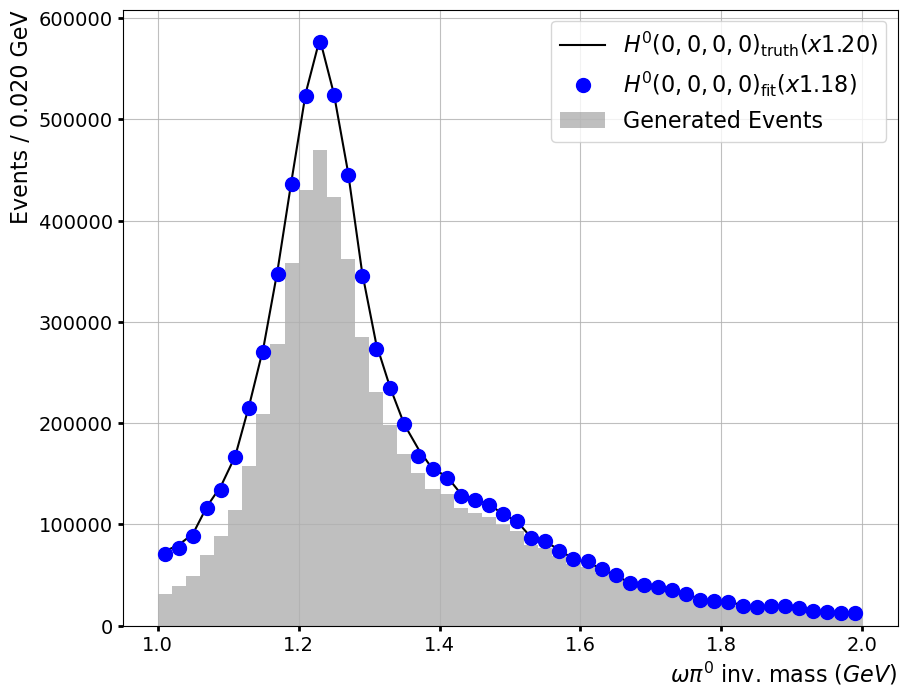

Plotting accept


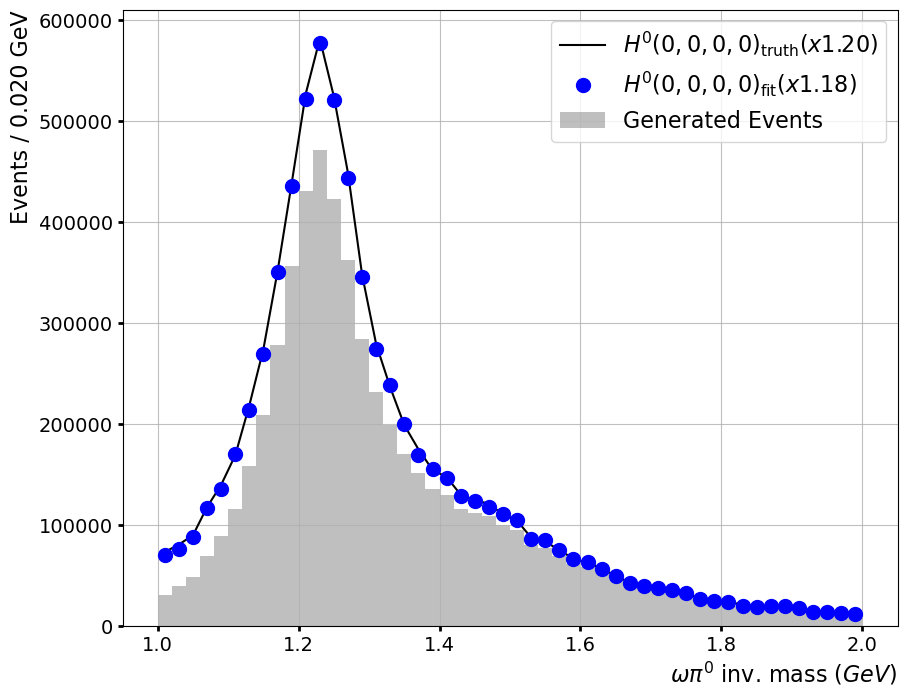

Plotting matched_noacc


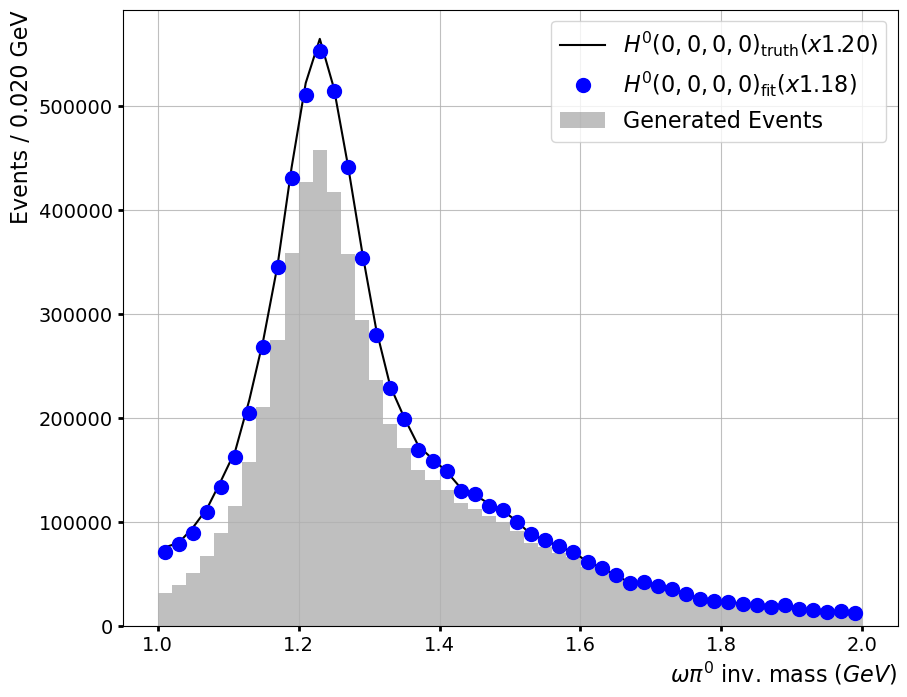

Plotting matched


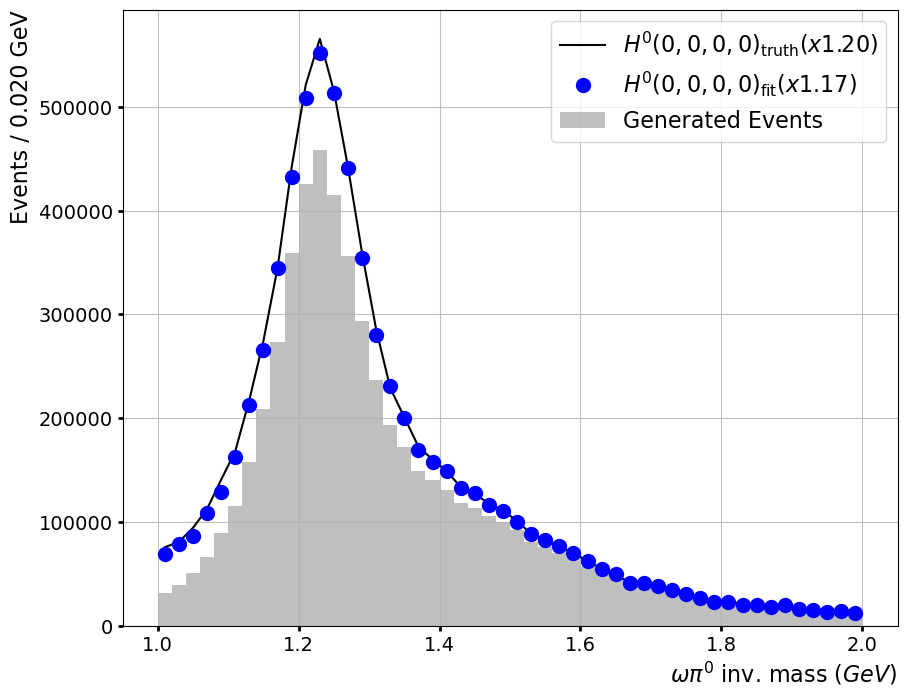

Plotting all_effects


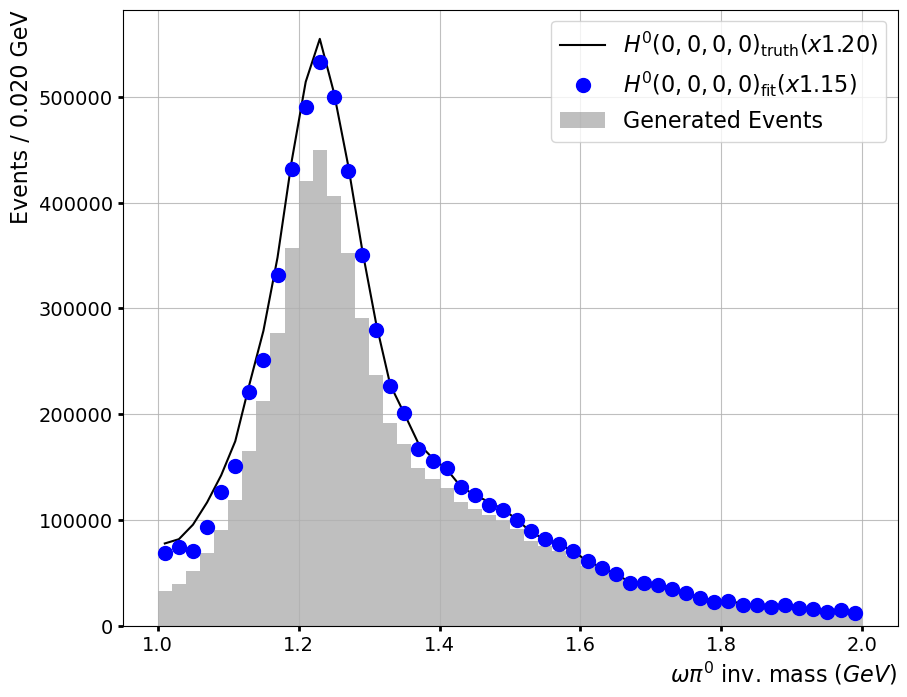

In [5]:
for key, val in df_array.items():
    h0_truth = val["truth_moments"]["H0(0,0,0,0)"].map(lambda x: x.real)
    h0_fit = val["fit_moments"]["H0(0,0,0,0)"].map(lambda x: x.real)
    generated_events = val["truth"]["generated_events"]

    scale_truth = (h0_truth / generated_events).mean()
    scale_fit = (h0_fit / generated_events).mean()    

    fig, ax = plt.subplots()
    mass_bins = val["data"]["m_center"]
    bin_width = (val["data"]["m_high"] - val["data"]["m_low"])[0]
    ax.bar(mass_bins, generated_events, width=bin_width, color="gray", alpha=0.5, label="Generated Events")    
    ax.plot(mass_bins, h0_truth, color="black", marker="", linestyle="-", label=rf"$H^0(0,0,0,0)_{{\text{{truth}}}} (x{scale_truth:.2f})$")
    ax.plot(mass_bins, h0_fit, color="blue", marker="o", linestyle="", label=rf"$H^0(0,0,0,0)_{{\text{{fit}}}} (x{scale_fit:.2f})$")

    print(f"Plotting {key}")
    ax.set_xlabel(r"$\omega\pi^0$ inv. mass $(GeV)$", loc="right")
    ax.set_ylabel(f"Events / {bin_width:.3f} GeV", loc="top")    
    ax.legend(loc="upper right")

    plt.show()


#### Finding non-zero moments
For our analysis we're only interested in those moments who are non-zero. We'll use the truth moments to determine this. To make sure we're not missing out on any interesting fitted moments, we'll simply print if the fitted moments are not within some `tolerance` value of 0.

In [ ]:
tolerance = 1e-10

nonzero_columns = []
for scenario, df in df_array.items():
    # get the nonzero columns for each scenario
    moment_columns = [col for col in df["truth_moments"] if col.startswith("H")]
    scenario_nonzero_columns = [col for col in moment_columns if (df["truth_moments"][col].abs() > tolerance).any()]

    # check if the nonzero columns are the same for each scenario
    if not nonzero_columns:
        nonzero_columns = scenario_nonzero_columns
    else:
        if set(nonzero_columns) != set(scenario_nonzero_columns):
            print(f"Scenario {scenario} has different nonzero moments")
            print(set(nonzero_columns) - set(scenario_nonzero_columns))

    # check if the nonzero columns are the same between truth and fit
    fit_cols = [col for col in moment_columns if (df["fit_moments"][col].abs() > tolerance).any()]
    if set(scenario_nonzero_columns) != set(fit_cols):
        print(f"Scenario {scenario} has different nonzero moments between truth and fit")        
        print(set(nonzero_columns) - set(fit_cols))
        
print(f"Reducing moments for all dataframes to {len(nonzero_columns)} nonzero moment columns")
for col in nonzero_columns:
    print(col)

for scenario, df_dict in df_array.items():
    for key in ["truth_moments", "fit_moments"]:        
        df_dict[key] = df_dict[key][["file"] + nonzero_columns]        

Reducing moments for all dataframes to 41 nonzero moment columns
H0(0,0,0,0)
H0(0,0,1,0)
H0(0,0,1,1)
H0(0,0,2,0)
H0(0,0,2,1)
H0(2,0,0,0)
H0(2,0,1,0)
H0(2,0,1,1)
H0(2,0,2,0)
H0(2,0,2,1)
H0(2,1,1,0)
H0(2,1,1,1)
H0(2,1,2,0)
H0(2,1,2,1)
H0(2,2,2,0)
H0(2,2,2,1)
H1(0,0,0,0)
H1(0,0,1,0)
H1(0,0,1,1)
H1(0,0,2,0)
H1(0,0,2,1)
H1(2,0,0,0)
H1(2,0,1,0)
H1(2,0,1,1)
H1(2,0,2,0)
H1(2,0,2,1)
H1(2,1,1,0)
H1(2,1,1,1)
H1(2,1,2,0)
H1(2,1,2,1)
H1(2,2,2,0)
H1(2,2,2,1)
H2(0,0,1,1)
H2(0,0,2,1)
H2(2,0,1,1)
H2(2,0,2,1)
H2(2,1,1,1)
H2(2,1,2,0)
H2(2,1,2,1)
H2(2,2,2,0)
H2(2,2,2,1)


#### Truth Moments Vs Detector Effect (with renormalization)
Aside from an overall scale factor, we don't expect the truth moments to change for each detector effect. We can account for this scale factor by using the normalized moments $\hat{H}^\alpha(J_v,\Lambda,J,M) = H^\alpha(J_v,\Lambda,J,M) / H^0(0,0,0,0)$. This also handles the fact that our fit and truth $H^0(0,0,0,0)$ moments do not match the number of generated events. We will continue to use these normalized moments for our analysis.

In [8]:
def normalize_moments(df: pd.DataFrame) -> pd.DataFrame:
    # avoid normalizing already normalized data   
    if (df["H0(0,0,0,0)"].map(lambda x: x.real) == 1).all():               
        return df
    moment_cols = [col for col in df.columns if col.startswith("H")]        
    return df[moment_cols].div(df["H0(0,0,0,0)"], axis=0)

for scenario, df_dict in df_array.items():
    for key, df in df_dict.items():
        if "moment" not in key:
            continue
        df_dict[key] = normalize_moments(df)        

Now we'll check if our truth moments are identical for each detector effect

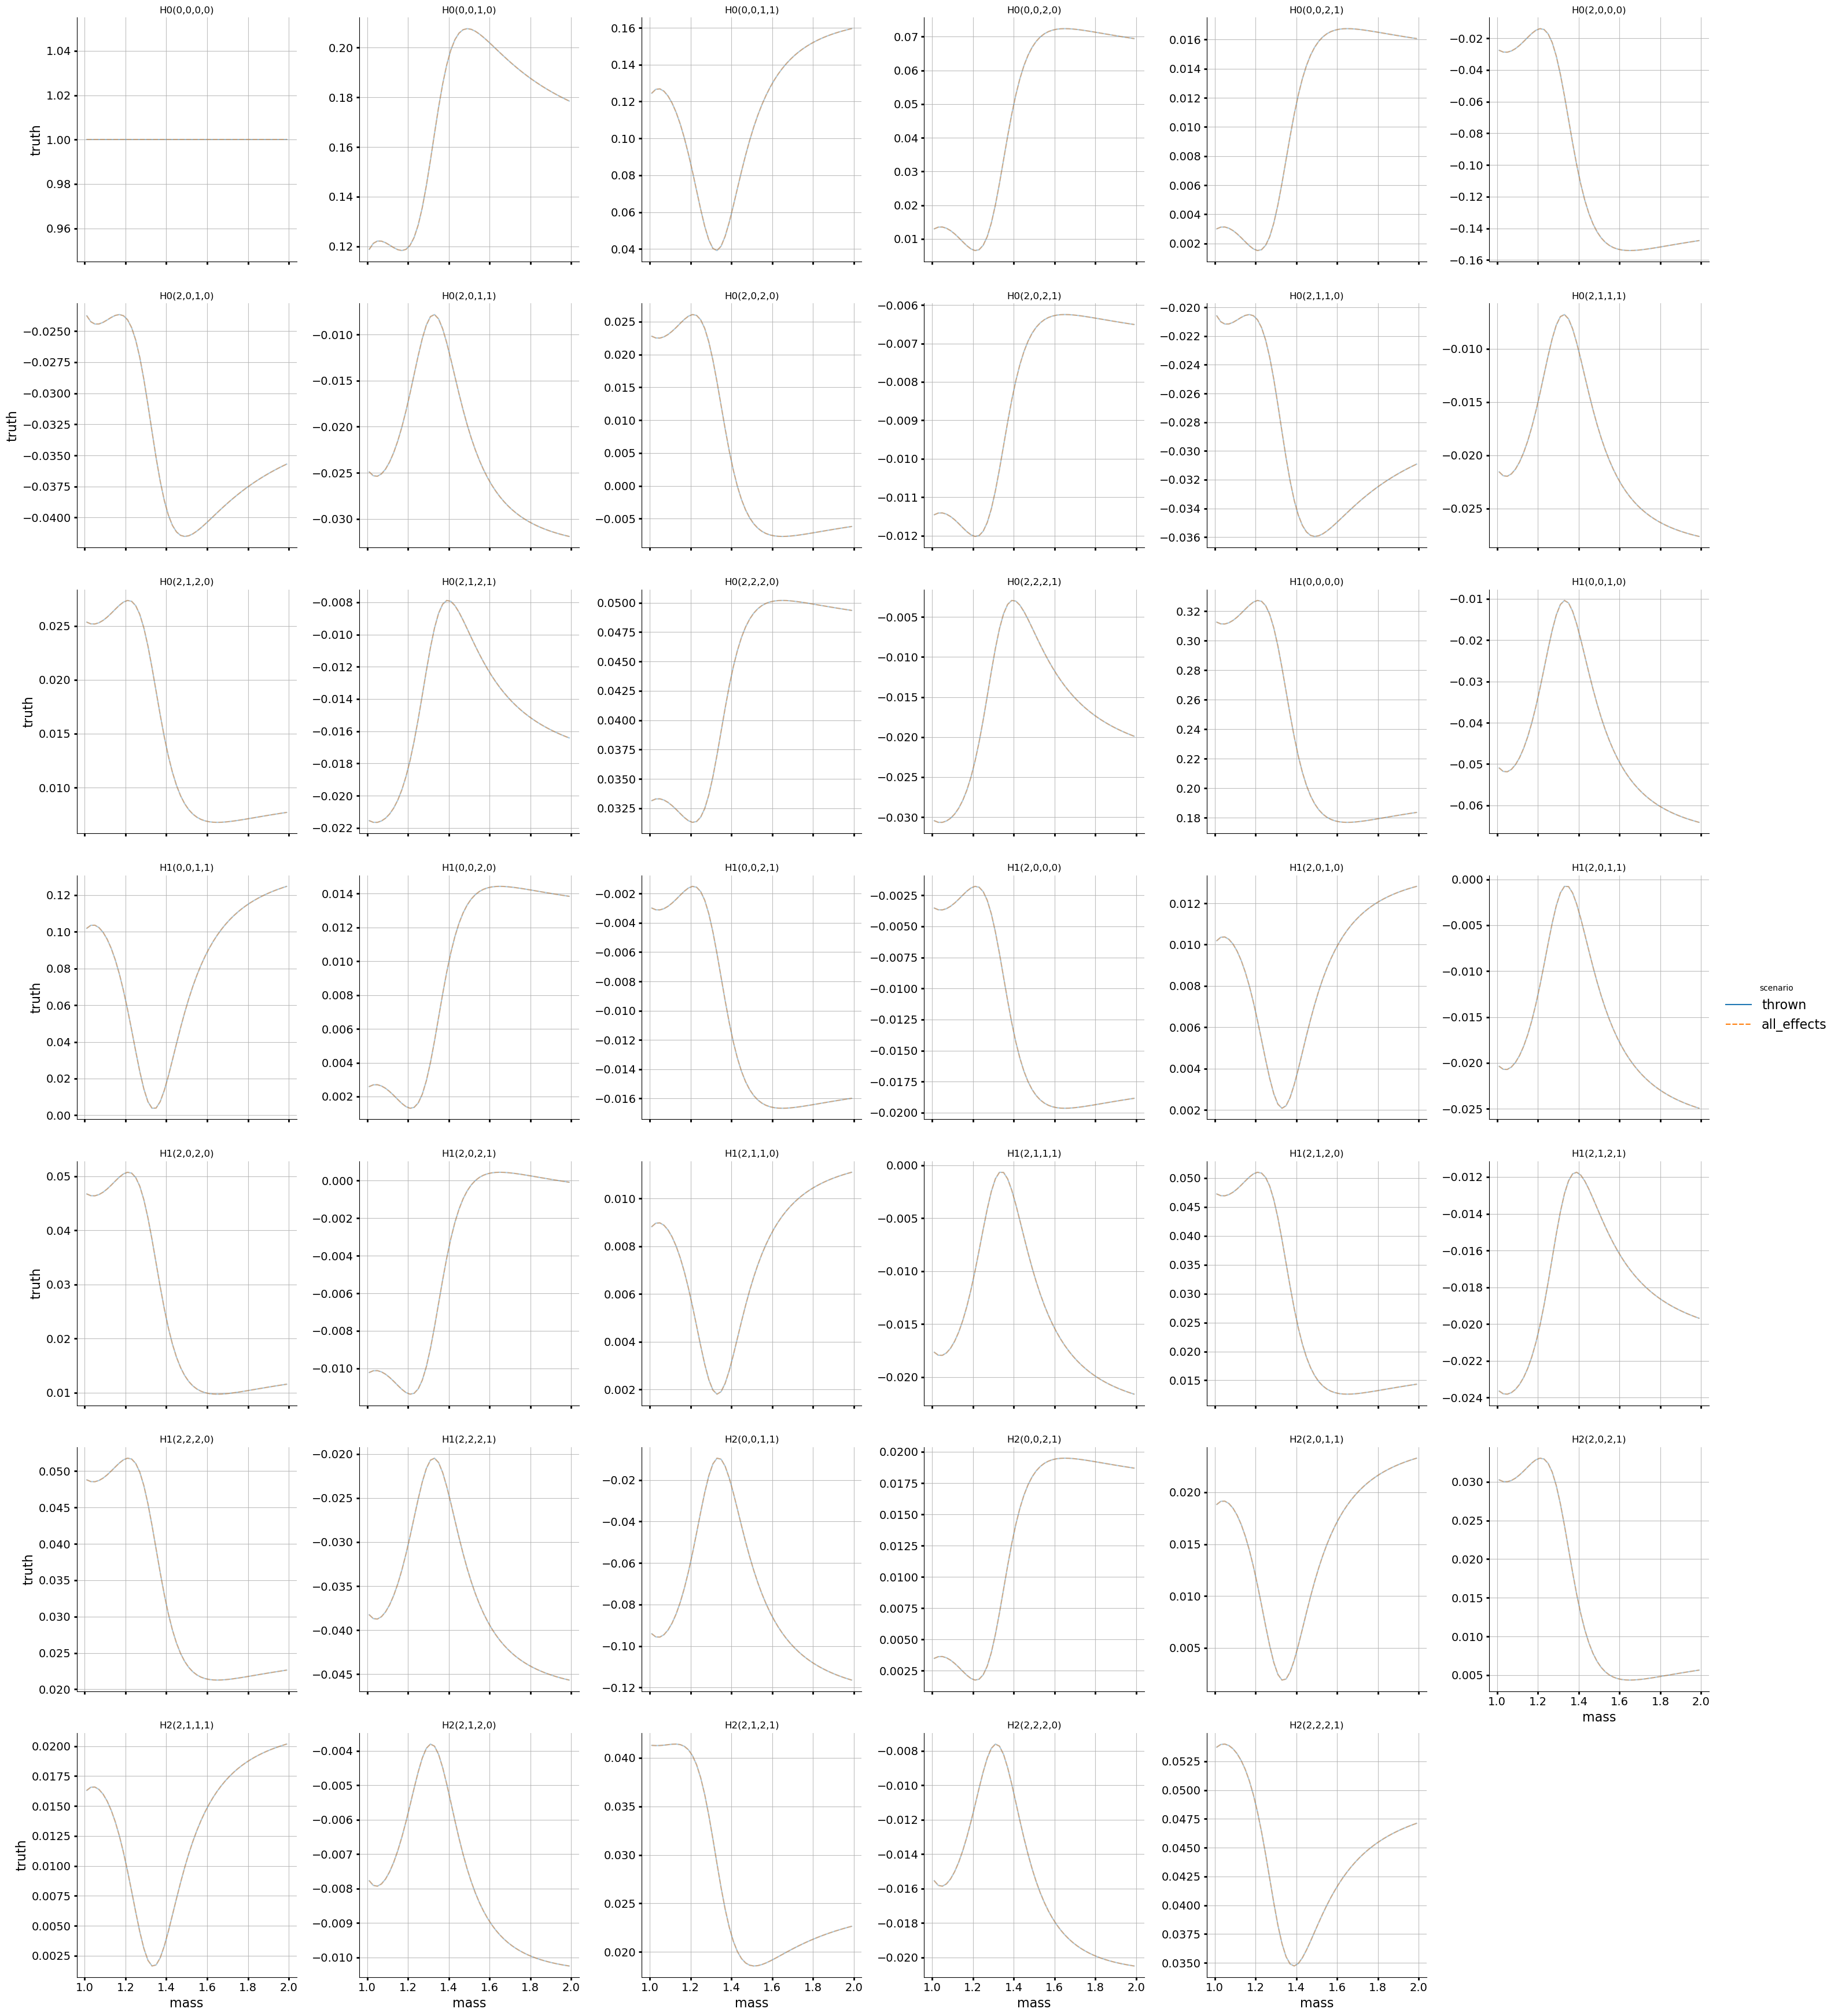

In [15]:
cols = df_array["thrown"]["truth_moments"].columns
nonzero_h0 = [col for col in cols if col.startswith("H0")]
nonzero_h1 = [col for col in cols if col.startswith("H1")]
nonzero_h2 = [col for col in cols if col.startswith("H2")]

# setup a dataframe to store the truth moments for each scenario
truth_df = pd.DataFrame()

for scenario, df in df_array.items():
    if scenario not in ["thrown", "all_effects"]:
        continue
    # get the nonzero real(imaginary) parts of the H0,H1,(H2) moments
    h0_truth = df["truth_moments"][nonzero_h0].map(lambda x: x.real)
    h1_truth = df["truth_moments"][nonzero_h1].map(lambda x: x.real)
    h2_truth = df["truth_moments"][nonzero_h2].map(lambda x: x.imag)

    # add those truth moments to the dataframe with the mass and scenario
    df = pd.concat([df["data"]["m_center"], h0_truth, h1_truth, h2_truth], axis=1)
    df.rename(columns={"m_center": "mass"}, inplace=True)
    df["scenario"] = scenario
    truth_df = pd.concat([truth_df, df])

# plot the relative truth moments for each scenario
truth_df_melted = truth_df.melt(id_vars=["mass", "scenario"], var_name="moment", value_name="truth")
grid = sns.relplot(
    data=truth_df_melted, x="mass", y="truth", col="moment", 
    col_wrap=6, kind="line", hue="scenario", style="scenario", facet_kws={'sharey': False}
)

for ax in grid.axes.flat:
    # remove the "moment = " from the title
    subplot_title = ax.get_title()
    ax.set_title(subplot_title.replace("moment = ", ""))
    # set the alpha value of each line
    for line in ax.get_lines():
        scenario = line.get_label()
        if scenario == "thrown":
            line.set_alpha(1.0)
        else:
            line.set_alpha(0.4)
plt.show()


## Analysis
With our data verified, we can move onto analysis. Lets plot the relative differences between the truth and fitted moments
$$
R =
\frac{
    \hat{H}^\alpha(J_v,\Lambda,J,M)_{\text{truth}} - \hat{H}^\alpha(J_v,\Lambda,J,M)_{\text{fit}}
}{
    \hat{H}^\alpha(J_v,\Lambda,J,M)_{\text{truth}}
}
\,.
$$
We use the relative difference (scaled by $H_{\text{truth}}$) because we do not yet have access to the uncertainties of the fitted or truth moments, so this provides us with some sense of how far off the fit results are from the true values

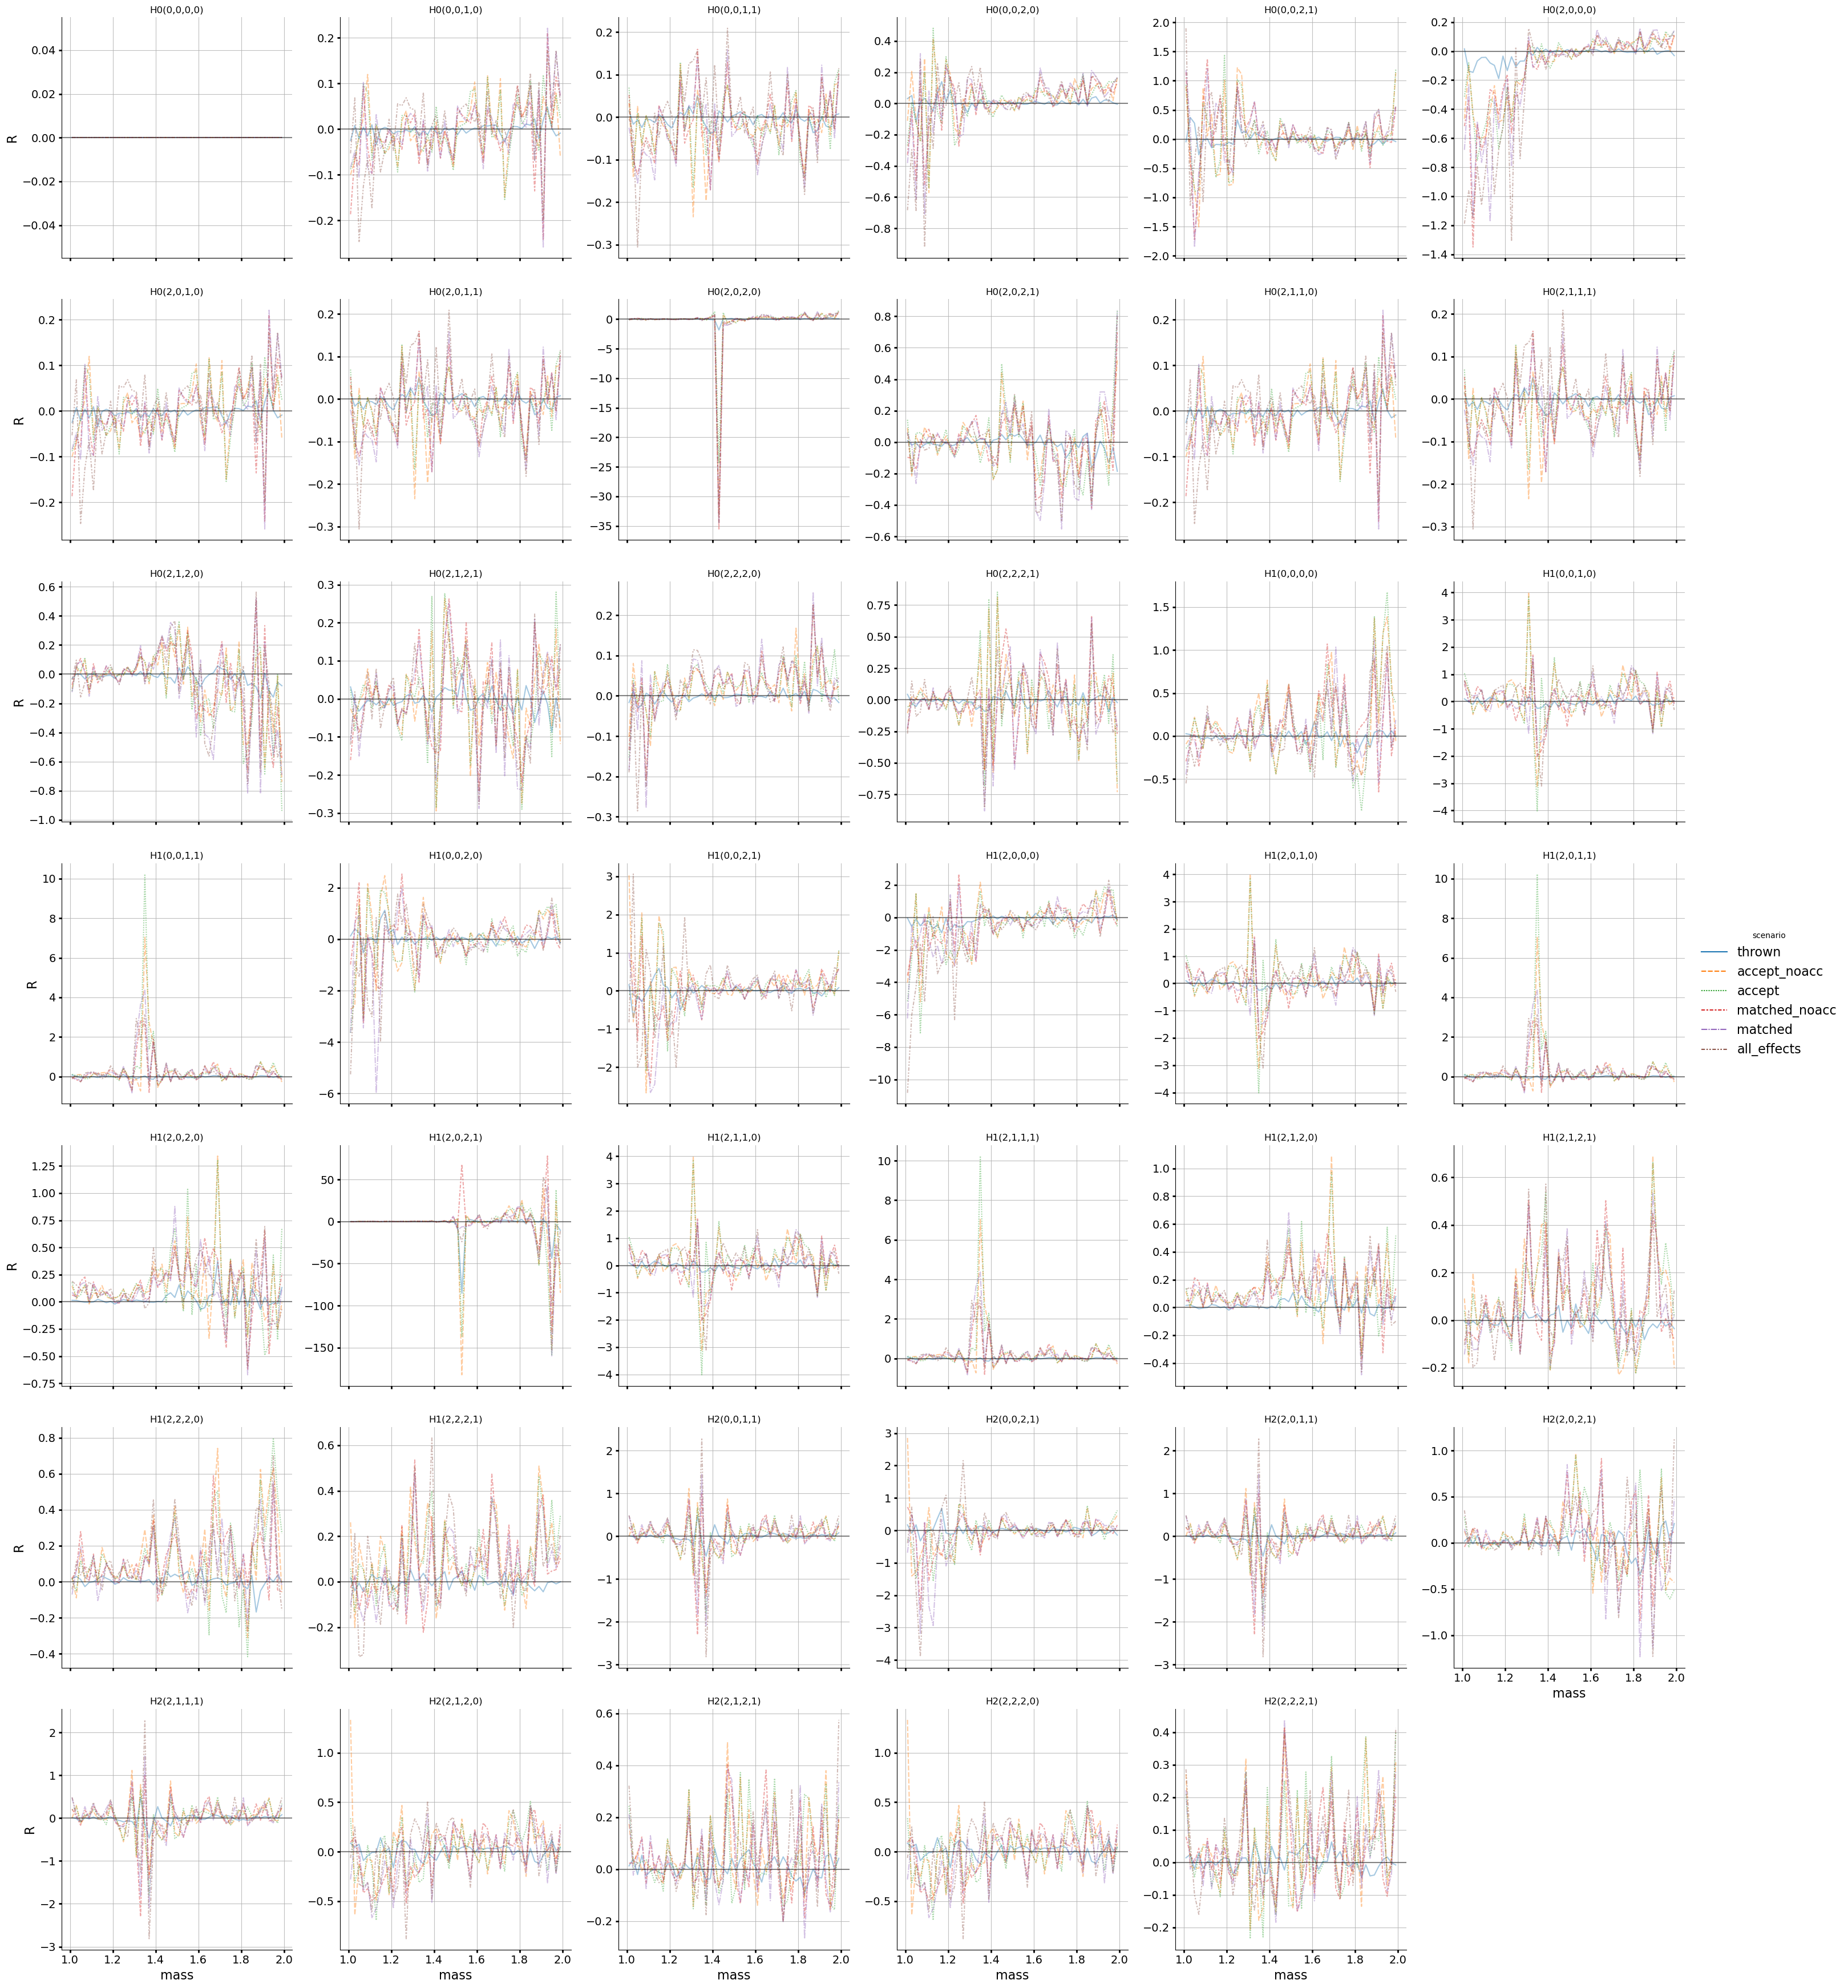

In [12]:
# split the nonzero columns by alpha value
cols = df_array["thrown"]["truth_moments"].columns
nonzero_h0 = [col for col in cols if col.startswith("H0")]
nonzero_h1 = [col for col in cols if col.startswith("H1")]
nonzero_h2 = [col for col in cols if col.startswith("H2")]

# setup a dataframe to store the relative differences R
reldiff_df = pd.DataFrame()

for scenario, df in df_array.items():
    # get the nonzero real(imaginary) parts of the H0,H1,(H2) moments
    h0_truth = df["truth_moments"][nonzero_h0].map(lambda x: x.real)
    h0_fit = df["fit_moments"][nonzero_h0].map(lambda x: x.real)
    h1_truth = df["truth_moments"][nonzero_h1].map(lambda x: x.real)
    h1_fit = df["fit_moments"][nonzero_h1].map(lambda x: x.real)
    h2_truth = df["truth_moments"][nonzero_h2].map(lambda x: x.imag)
    h2_fit = df["fit_moments"][nonzero_h2].map(lambda x: x.imag)

    # calculate the relative difference between the truth and fit moments
    h0_diff = (h0_truth - h0_fit) / h0_truth
    h1_diff = (h1_truth - h1_fit) / h1_truth
    h2_diff = (h2_truth - h2_fit) / h2_truth    

    # put those relative differences into a dataframe with the mass bins
    diff_df = pd.concat([df["data"]["m_center"], h0_diff, h1_diff, h2_diff], axis=1)
    diff_df.rename(columns={"m_center": "mass"}, inplace=True)
    diff_df["scenario"] = scenario
    reldiff_df = pd.concat([reldiff_df, diff_df])

# plot the relative differences
reldiff_df_melted = reldiff_df.melt(id_vars=["mass", "scenario"], var_name="moment", value_name="R")
grid = sns.relplot(
    data=reldiff_df_melted, x="mass", y="R", col="moment", 
    col_wrap=6, kind="line", hue="scenario", style="scenario", facet_kws={'sharey': False}
)


for ax in grid.axes.flat:
    ax.axhline(y=0, color='black', linestyle='-') # Add a horizontal line at y=0 to each plot
    # remove the "moment = " from the title
    subplot_title = ax.get_title()
    ax.set_title(subplot_title.replace("moment = ", ""))
    # set the alpha value of each line
    for line in ax.get_lines():
        scenario = line.get_label()
        if scenario == "thrown":
            line.set_alpha(1.0)
        else:
            line.set_alpha(0.4)
plt.show()
    

Below here is scratch work, stuff that I'll want to formerly put together above. I'll list some other todo stuff
* Make plots like I did for detector_effects study, with mass distribution and a difference plot below it, but make that plot be something like the absolute scaled difference between moments $\frac{H_{fit} - H_{gen}}{H_{gen}}$
  * I'll have to use this instead of dividing by uncertainty because I can't propagate the partial wave errors yet
  * Maybe have the project_moments script create another csv file that acts like a matrix, showing what values a partial wave contributes to a moment. I could use this for these plots when it comes to showing individual amplitudes, since using the scaled difference of *all* moments wouldn't be accurate as many of those moments would not have contributions from the amplitude being plotted

In [ ]:


fit_df = pd.read_csv("../../../fits.csv")
moment_df = pd.read_csv("../../../moments.csv", index_col="file")

print(moment_df["H0(0,0,0,0)"].apply(lambda x: complex(x).real).max())
print(fit_df["generated_events"].max())
scale = moment_df["H0(0,0,0,0)"].apply(lambda x: complex(x).real).max() / fit_df["generated_events"].max()
print(scale)
fit_df["generated_events"].plot(label="gen events")
(fit_df["generated_events"]*scale).plot(label="scaled events")
moment_df["H0(0,0,0,0)"].apply(lambda x: complex(x).real).plot(label="H0(0,0,0,0)")
plt.legend()

Print the sum of the real and imaginary parts for each moment. We'll want to formarly do this in the final text because this is a good way to check that we projected things properly 

In [ ]:
alpha = 0
for col in moment_df.columns:
    if col.split("(")[0][1] != alpha:
        print("-"*50)
    alpha = col.split("(")[0][1]
    real_sum = moment_df[col].apply(lambda x: complex(x).real).sum()
    imag_sum = moment_df[col].apply(lambda x: complex(x).imag).sum()    

    print(f"{col:<10}: {real_sum:<13.3f} + {imag_sum:.3f}i")

/w/halld-scshelf2101/kscheuer/neutralb1/analysis/scripts/pwa_tools.py:69: UserWarning: the following indices contain fit results whose covariance matrix is not full and accurate.
  warnings.warn(


19    2
20    2
25    2
26    2
28    2
32    2
33    2
34    2
35    2
36    2
38    2
40    2
41    2
42    2
44    2
45    2
46    2
48    2
Name: eMatrixStatus, dtype: int64


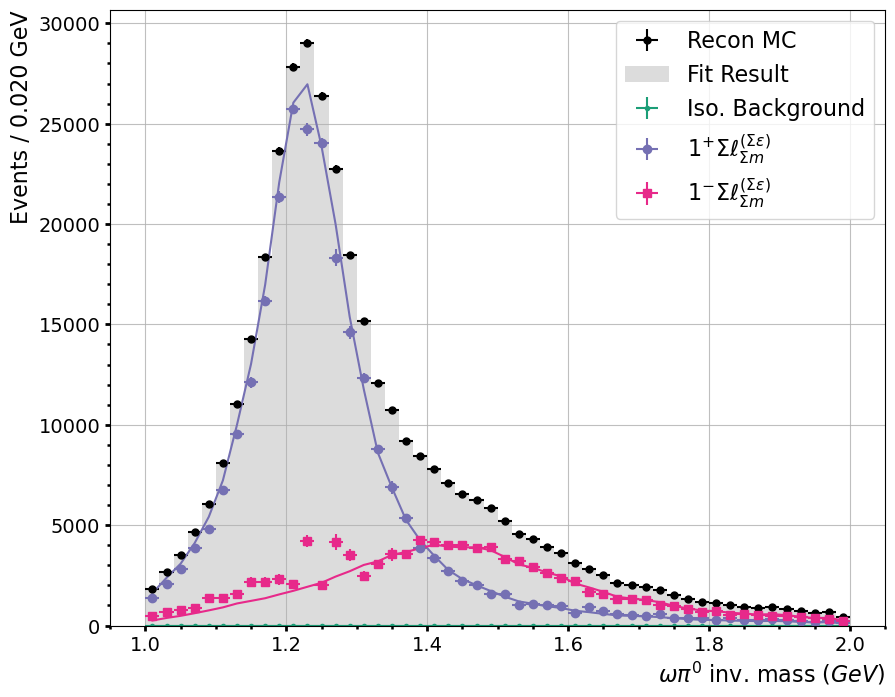

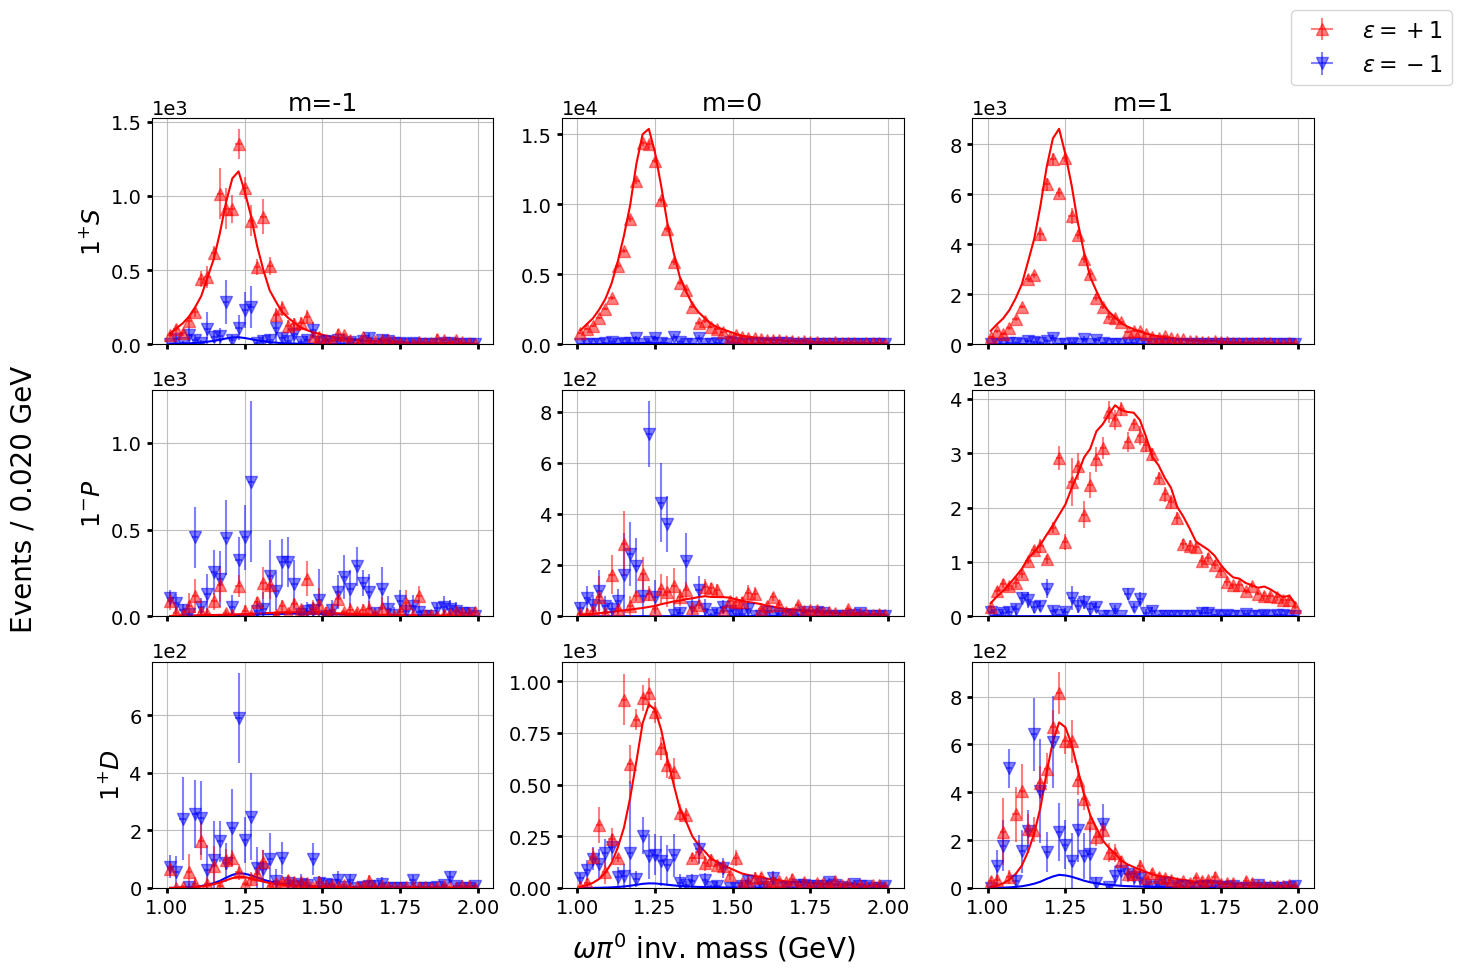

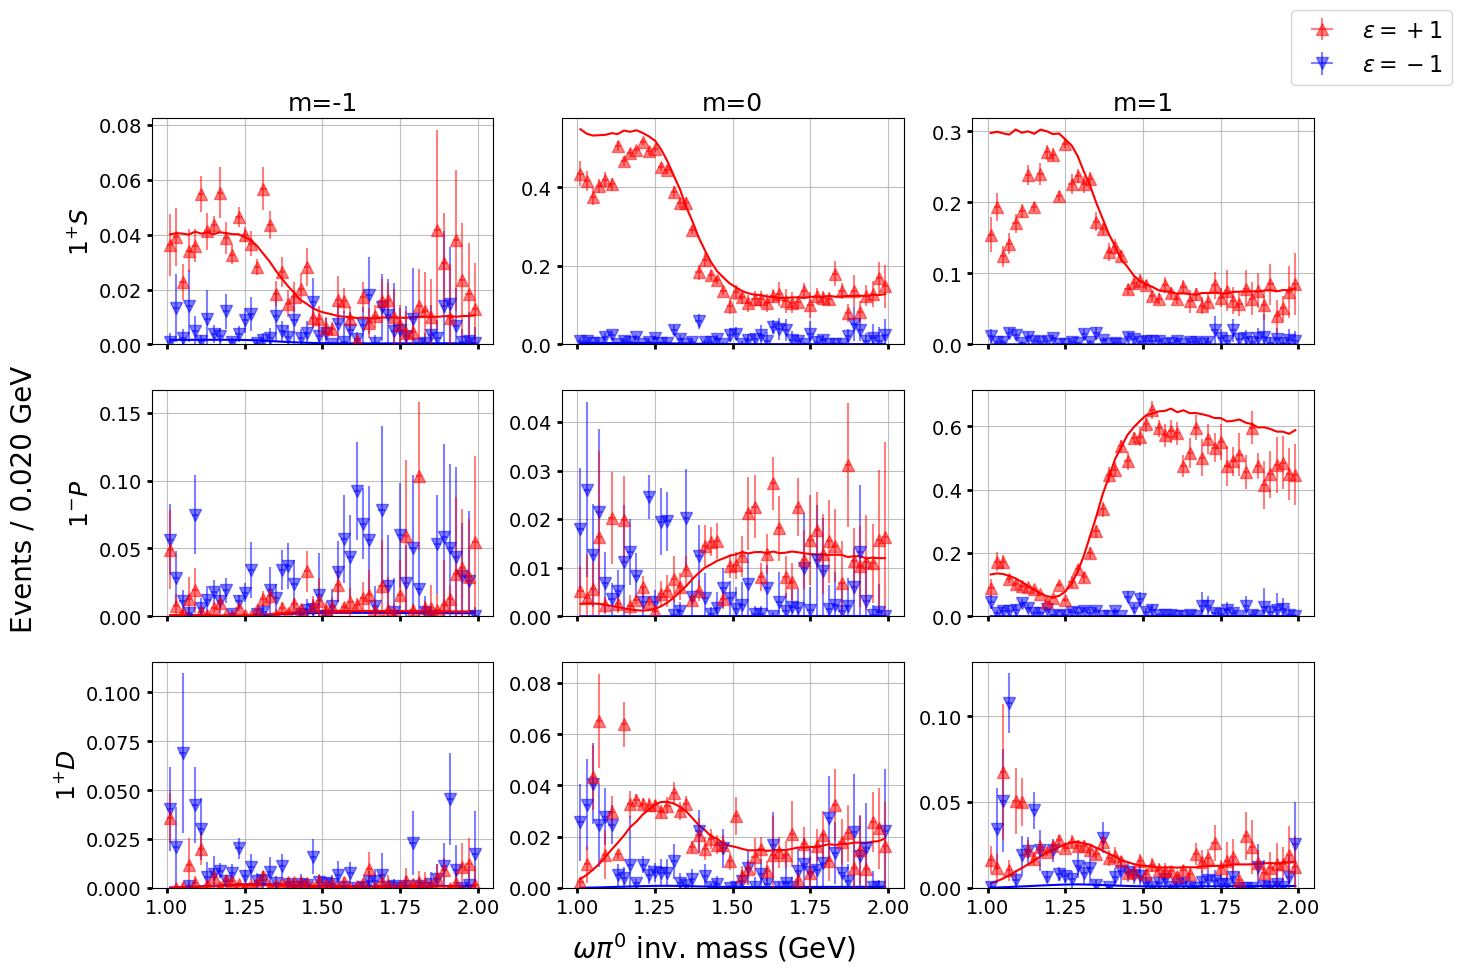

In [9]:
# quick moment check for all effects case
all_plotter = pwa_tools.Plotter(df_all_fit, df_all_data, truth_df=df_all_truth)
all_plotter.jp("Recon MC")
all_plotter.intensities()
all_plotter.intensities(True)

/scratch/kscheuer/ipykernel_3486758/3812909478.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_truth_moments[h0_moments].applymap(lambda x: x.imag).plot()
/scratch/kscheuer/ipykernel_3486758/3812909478.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_truth_moments[h1_moments].applymap(lambda x: x.imag).plot()
/scratch/kscheuer/ipykernel_3486758/3812909478.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_all_truth_moments[h2_moments].applymap(lambda x: x.real).plot()
/scratch/kscheuer/ipykernel_3486758/3812909478.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df = (df_scaled_truth - df_scaled_fit).div(df_scal

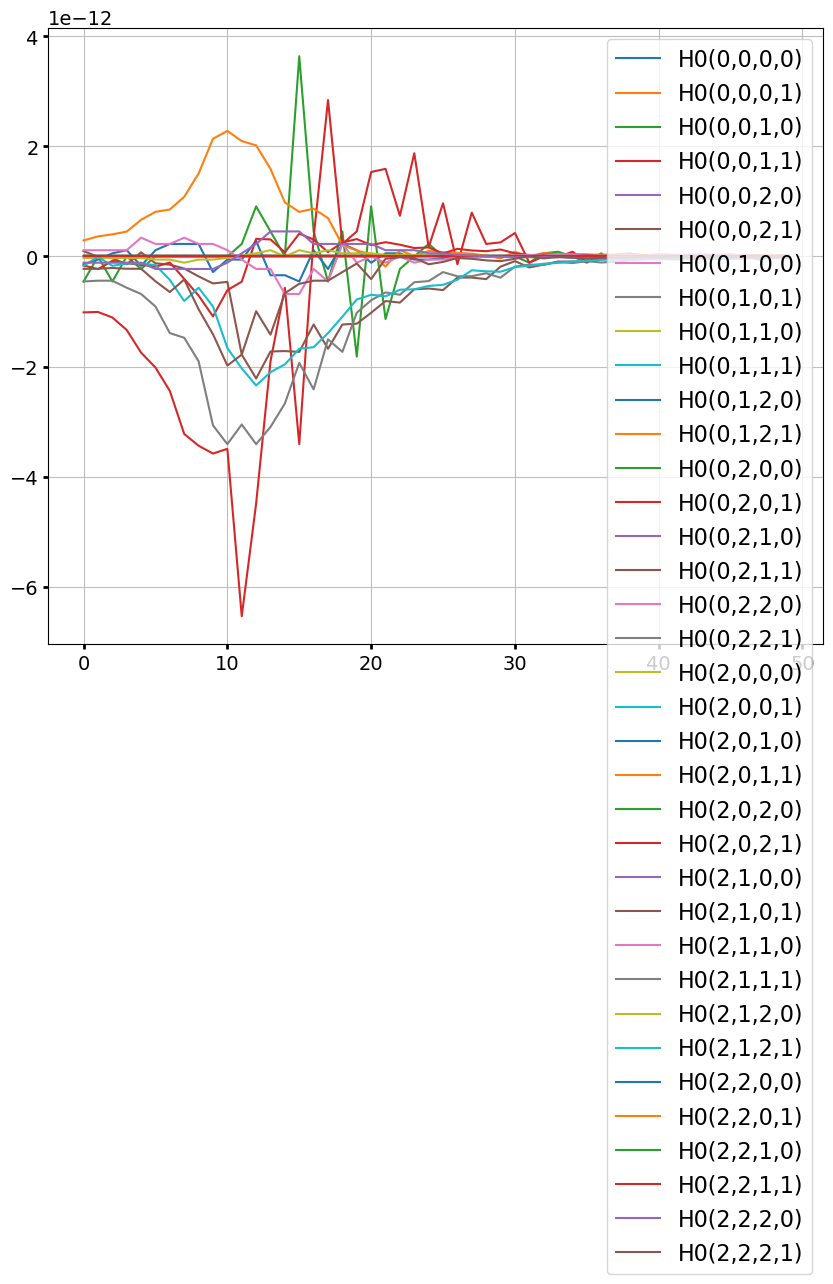

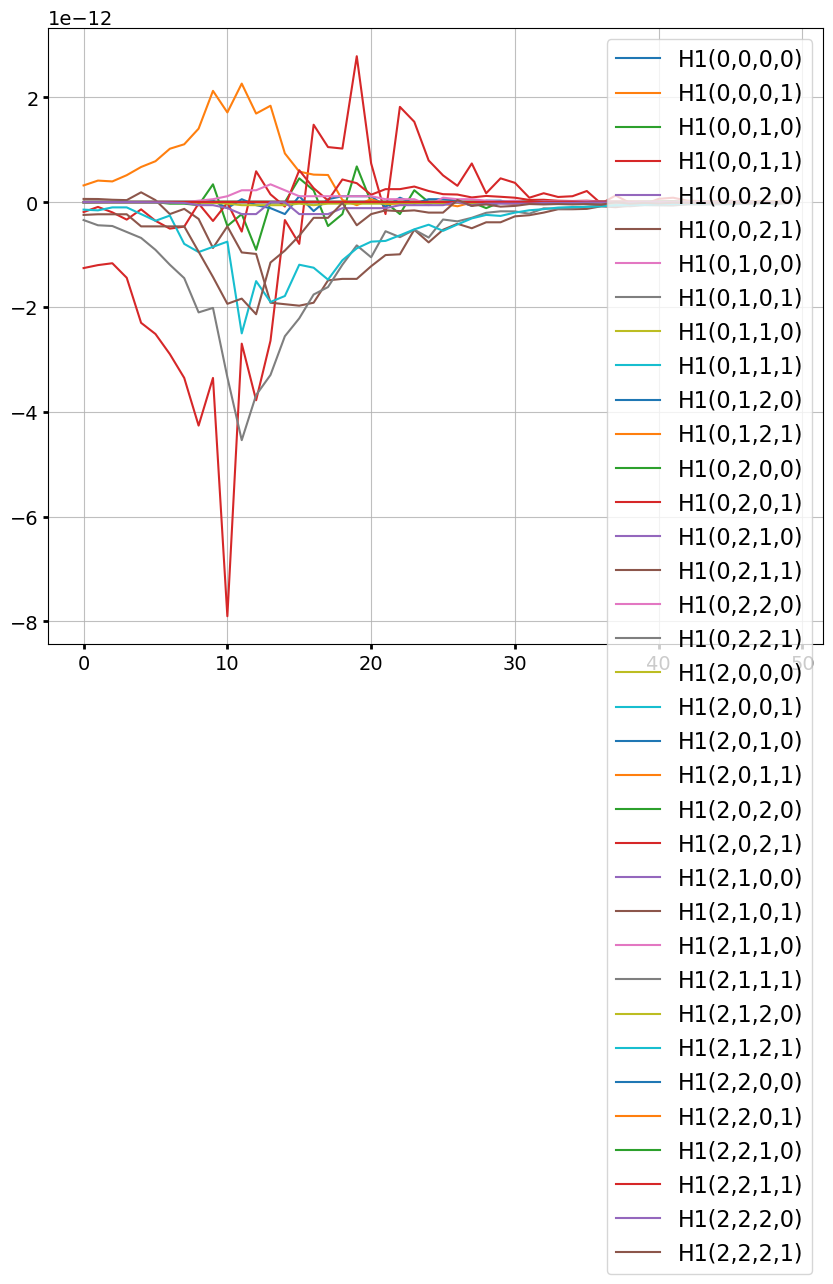

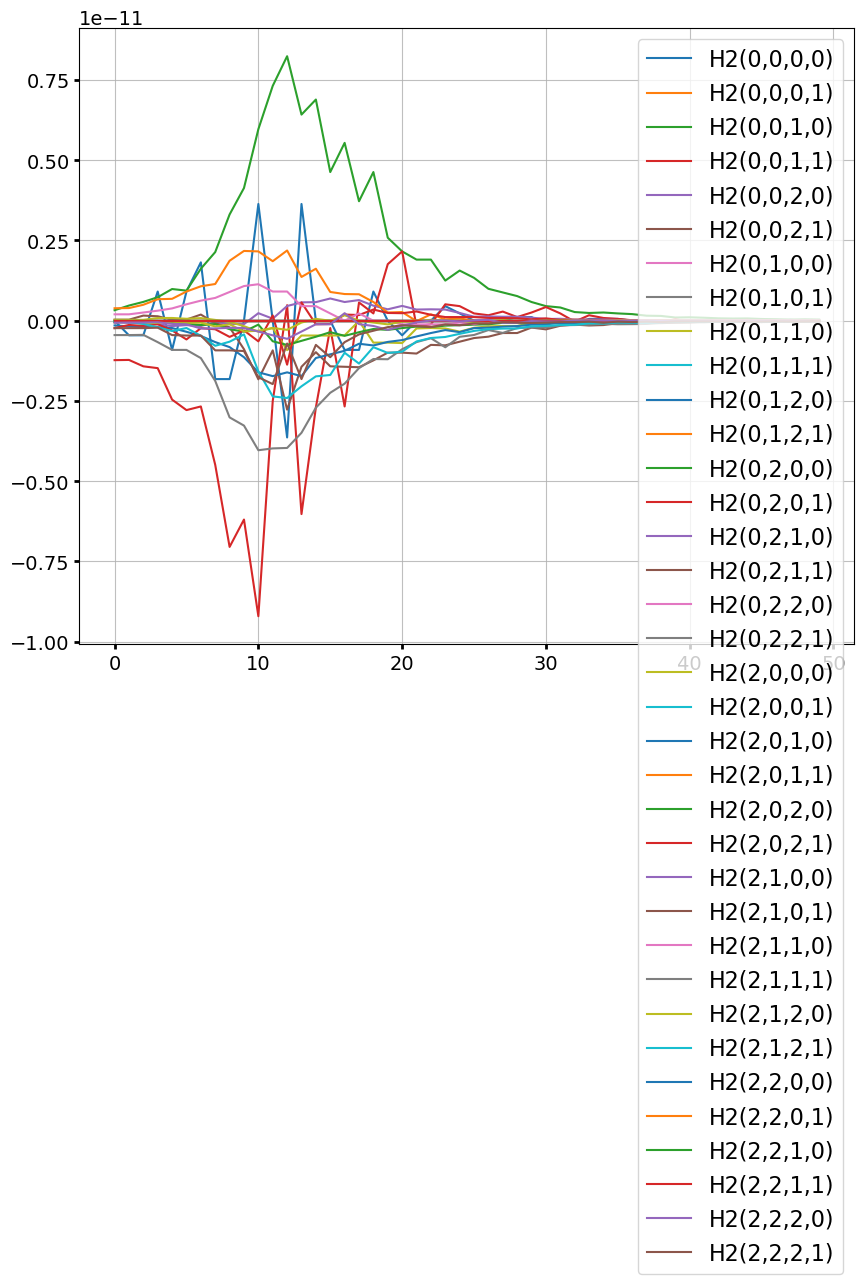

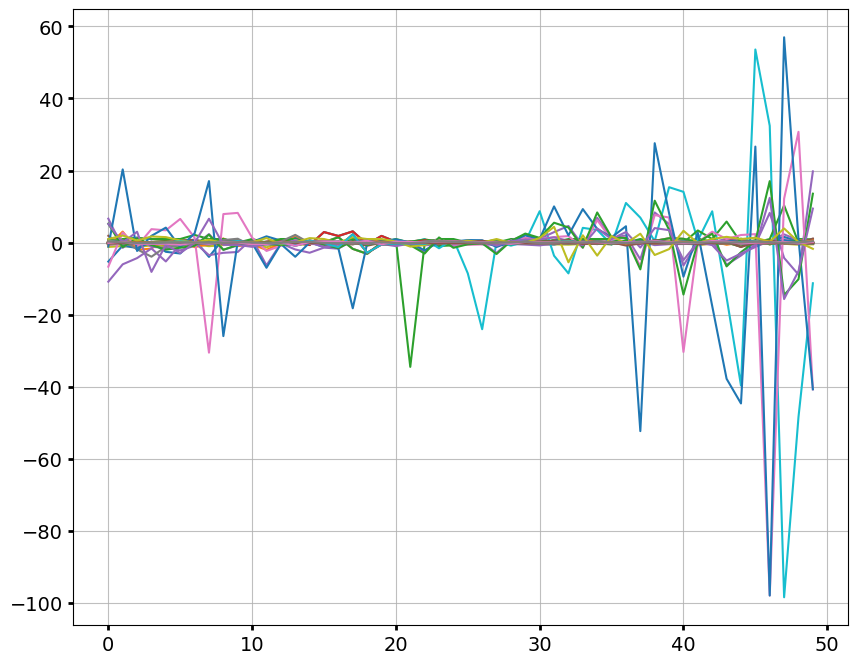

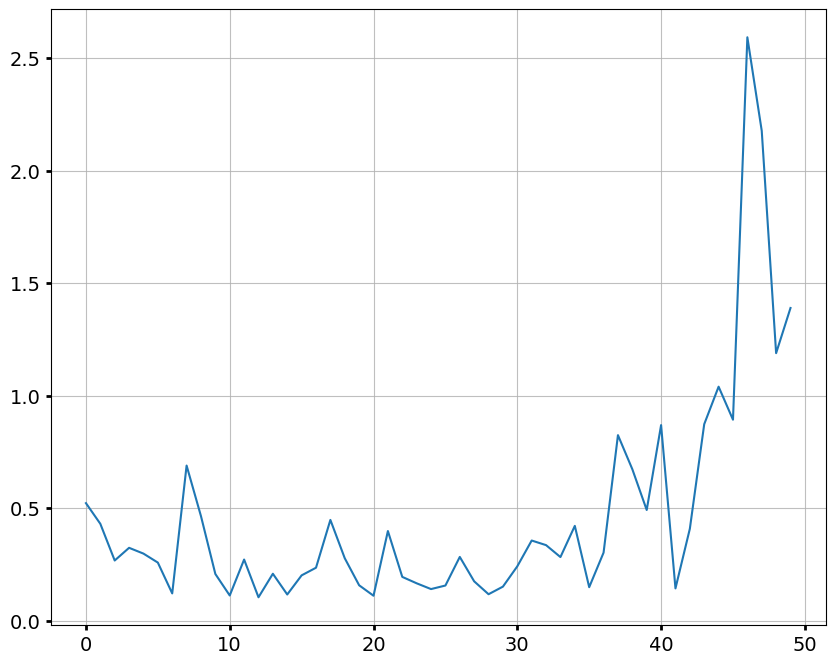

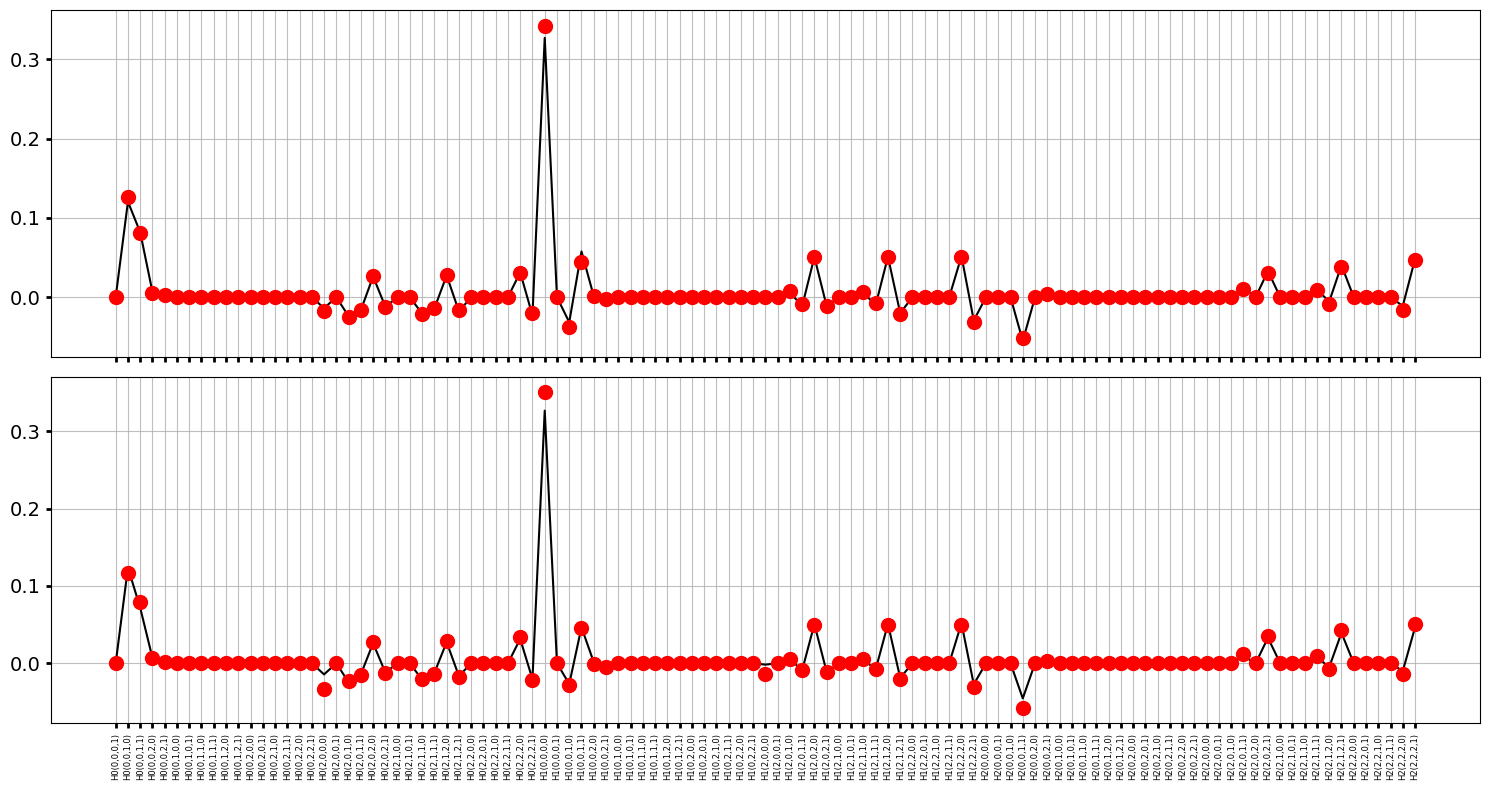

In [6]:
# obtain moment columns (just remove the file column)
moment_columns = df_all_truth_moments.columns[df_all_truth_moments.columns != "file"]

df_all_truth_moments[h0_moments].applymap(lambda x: x.imag).plot()
df_all_truth_moments[h1_moments].applymap(lambda x: x.imag).plot()
df_all_truth_moments[h2_moments].applymap(lambda x: x.real).plot()

# okay so the standard process will be to plot the imag parts of H0 and H1 and the real part of H2 to make sure they're all sufficiently small

# Rescale all the moments by the H0(0,0,0,0) moment. This appears to b needed in order to compare the truth to the fit moments
df_scaled_truth = df_all_truth_moments[moment_columns].div(df_all_truth_moments["H0(0,0,0,0)"], axis=0)
df_scaled_fit = df_all_fit_moments[moment_columns].div(df_all_fit_moments["H0(0,0,0,0)"], axis=0)

# plot subtracted values scaled by truth values
new_df = (df_scaled_truth - df_scaled_fit).div(df_scaled_truth.replace(0+0j, np.nan), axis=0).fillna(0+0j)
new_df.plot(legend=None)
plt.show()

abs_sum = new_df.abs().sum(axis=1)

sum_df = abs_sum / new_df.abs().count(axis=1)
plt.plot(sum_df.index, sum_df)
plt.show()

# make a plot of the moments in the 11th and 12 bins, whose JP amplitudes are very far apart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

# avoid the first scaled moment which is defined to be 1.0
cols = [col for col in moment_columns if col != "H0(0,0,0,0)"]
real_cols = [col for col in cols if col.startswith("H0") or col.startswith("H1")]
imag_cols = [col for col in cols if col.startswith("H2")]

row1_truth = [x.real if col in real_cols else x.imag for col, x in zip(cols, df_scaled_truth.iloc[10][cols])]
row1_fit = [x.real if col in real_cols else x.imag for col, x in zip(cols, df_scaled_fit.iloc[10][cols])]
ax1.plot(cols, row1_truth, color="black")
ax1.plot(cols, row1_fit, linestyle="", marker="o", color="red")

row2_truth = [x.real if col in real_cols else x.imag for col, x in zip(cols, df_scaled_truth.iloc[11][cols])]
row2_fit = [x.real if col in real_cols else x.imag for col, x in zip(cols, df_scaled_fit.iloc[11][cols])]
ax2.plot(cols, row2_truth, color="black")
ax2.plot(cols, row2_fit, linestyle="", marker="o", color="red")
plt.xticks(rotation=90, fontsize=6)


plt.tight_layout()
plt.show()


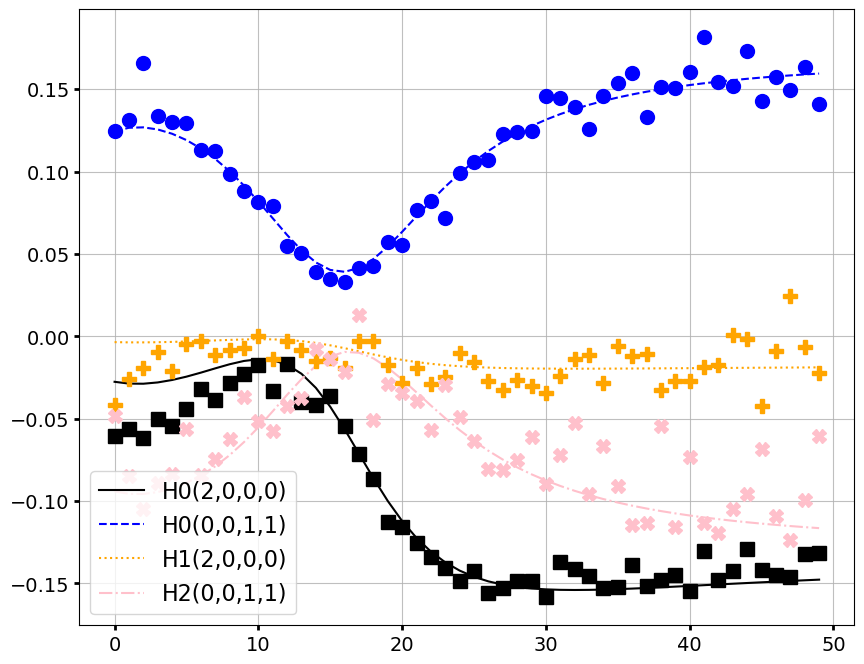

In [7]:
new_cols = ["H0(2,0,0,0)", "H0(0,0,1,1)", "H1(2,0,0,0)"]

df_scaled_truth["H0(2,0,0,0)"].map(lambda x: x.real).plot(linestyle="-", color="black")
df_scaled_truth["H0(0,0,1,1)"].map(lambda x: x.real).plot(linestyle="--", color="blue")
df_scaled_truth["H1(2,0,0,0)"].map(lambda x: x.real).plot(linestyle=":", color="orange")
df_scaled_truth["H2(0,0,1,1)"].map(lambda x: x.imag).plot(linestyle="-.", color="pink")

df_scaled_fit["H0(2,0,0,0)"].map(lambda x: x.real).plot(linestyle="", marker="s", color="black", label="")
df_scaled_fit["H0(0,0,1,1)"].map(lambda x: x.real).plot(linestyle="", marker="o", color="blue", label="")
df_scaled_fit["H1(2,0,0,0)"].map(lambda x: x.real).plot(linestyle="", marker="P", color="orange", label="")
df_scaled_fit["H2(0,0,1,1)"].map(lambda x: x.imag).plot(linestyle="", marker="X", color="pink", label="")

plt.legend()
plt.show()
